In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
import numpy as np
import random
import tensorflow as tf

# 1. ÌååÏù¥Ïç¨ ÎûúÎç§
random.seed(42)

# 2. ÎÑòÌååÏù¥ ÎûúÎç§
np.random.seed(42)

# 3. ÌÖêÏÑúÌîåÎ°ú ÎûúÎç§
tf.random.set_seed(42)

In [3]:
import pandas as pd
df = pd.read_csv('/content/exchange_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     300 non-null    int64  
 1   TIME           300 non-null    object 
 2   Ïõê/Îã¨Îü¨ÌôòÏú®         300 non-null    float64
 3   ÌïúÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    291 non-null    float64
 4   ÎØ∏Íµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 5   Ï§ëÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    132 non-null    float64
 6   ÌïúÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 7   ÎØ∏Íµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 8   Ï§ëÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 9   Ï†ÑÏ≤¥ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 10  ÎØ∏Íµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 11  Ï§ëÍµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 12  Ï†ÑÏ≤¥ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 13  ÎØ∏Íµ≠ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 14  Ï§ëÍµ≠ ÏàòÏûÖ Ï¥ùÏï°

In [4]:
df_fill = df.interpolate(method='linear')
df_fill = df_fill.fillna(method='ffill').fillna(method='bfill')

<ipython-input-4-e6a07bd6edf8>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_fill = df.interpolate(method='linear')
<ipython-input-4-e6a07bd6edf8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill = df_fill.fillna(method='ffill').fillna(method='bfill')


In [6]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     300 non-null    int64  
 1   TIME           300 non-null    object 
 2   Ïõê/Îã¨Îü¨ÌôòÏú®         300 non-null    float64
 3   ÌïúÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 4   ÎØ∏Íµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 5   Ï§ëÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 6   ÌïúÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 7   ÎØ∏Íµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 8   Ï§ëÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 9   Ï†ÑÏ≤¥ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 10  ÎØ∏Íµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 11  Ï§ëÍµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 12  Ï†ÑÏ≤¥ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 13  ÎØ∏Íµ≠ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 14  Ï§ëÍµ≠ ÏàòÏûÖ Ï¥ùÏï°

## shiftÎêú t+1 ÏòàÏ∏°

In [5]:
features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
    'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
    'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©',
    'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDP',
    'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'ÌïúÍµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'ÎØ∏Íµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'vix'
]

# ÌÉÄÍ≤ü ÏÉùÏÑ±
df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'] = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®'].shift(-1)

# ÌÉÄÍ≤ü
target = ['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']

# X, y ÎÇòÎàÑÍ∏∞ Ï†ÑÏóê Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_fill = df_fill.dropna(subset=features + ['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']).reset_index(drop=True)

In [6]:
# X(ÏûÖÎ†•Í∞í) Í≥º y(ÌÉÄÍ≤üÍ∞í) ÏùÑ ÎÇòÎàî
X = df_fill[features]
y = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']

### ÏãúÌÄÄÏä§ ÏÉùÏÑ±


"ÏµúÍ∑º 12Í∞úÏõî" Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÏúºÎ°ú Ï£ºÍ≥† ‚Üí "Í∑∏ Îã§Ïùå Îã¨" ÌôòÏú®ÏùÑ ÏòàÏ∏°

In [41]:
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])  # seq_length Í∏∏Ïù¥ÎßåÌÅº ÏûÖÎ†•
        ys.append(y[i+seq_length])    # seq_length Ïù¥ÌõÑ Í∞íÏùÑ ÌÉÄÍ≤üÏúºÎ°ú
    return np.array(Xs), np.array(ys)

seq_length = 12
X_seq, y_seq = create_sequences(X.values, y.values, seq_length)


### ÌõàÎ†®/ ÌÖåÏä§Ìä∏ Î∂ÑÌï†

- ÏãúÍ≥ÑÏó¥Ïù¥Îãà shuffle ÏóÜÏù¥

- ÏãúÍ∞Ñ ÏàúÏÑú Ïú†ÏßÄÌïòÎ©¥ÏÑú 8:2Î°ú Î∂ÑÎ¶¨

In [42]:
split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

### Ï†ïÍ∑úÌôî MinMaxScaler()

In [43]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [44]:
# 1. X_train Ïä§ÏºÄÏùºÎßÅ
nsamples, timesteps, nfeatures = X_train_raw.shape
X_train_2d = X_train_raw.reshape((nsamples * timesteps, nfeatures))
X_train_scaled_2d = scaler_X.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape((nsamples, timesteps, nfeatures))

# 2. y_train Ïä§ÏºÄÏùºÎßÅ
y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

# 3. X_test Ïä§ÏºÄÏùºÎßÅ
nsamples_test, timesteps, nfeatures = X_test_raw.shape
X_test_2d = X_test_raw.reshape((nsamples_test * timesteps, nfeatures))
X_test_scaled_2d = scaler_X.transform(X_test_2d)  # X_testÎäî transformÎßå ÏÇ¨Ïö©
X_test_scaled = X_test_scaled_2d.reshape((nsamples_test, timesteps, nfeatures))

# 4. y_test Ïä§ÏºÄÏùºÎßÅ
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

### GRU Î™®Îç∏

In [12]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.1), # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
    GRU(32),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam') # ÌöåÍ∑ÄÎ¨∏Ï†ú mse

# validation_lossÍ∞Ä 10 epoch ÎèôÏïà Í∞úÏÑ† ÏïàÎêòÎ©¥ ÏûêÎèô Ï¢ÖÎ£åÌïòÍ≥† ÏµúÏ†Å Î™®Îç∏ Î≥µÍµ¨
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ÌïôÏäµ
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 62ms/step - loss: 0.1047 - val_loss: 0.0312
Epoch 2/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.0344 - val_loss: 0.0709
Epoch 3/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - loss: 0.0163 - val_loss: 0.0307
Epoch 4/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - loss: 0.0115 - val_loss: 0.0353
Epoch 5/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - loss: 0.0099 - val_loss: 0.0256
Epoch 6/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 32ms/step - loss: 0.0092 - val_loss: 0.0148
Epoch 7/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step - loss: 0.0094 - val_loss: 0.0137
Epoch 8/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - loss: 0.0071 - val_loss: 0.0092
Epoc

### ÏòàÏ∏° Î∞è Î≥µÏõê

ÏòàÏ∏°Í∞íÏùÑ Îã§Ïãú ÏõêÎûò Îã®ÏúÑ(ÌôòÏú®)Î°ú Î≥µÍµ¨

In [13]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 413ms/step


### ÏÑ±Îä• ÌèâÍ∞Ä

In [14]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R¬≤: {r2:.4f}")

‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º
MSE: 11752.6305
RMSE: 108.4095
MAE: 91.2190
R¬≤: -0.3498


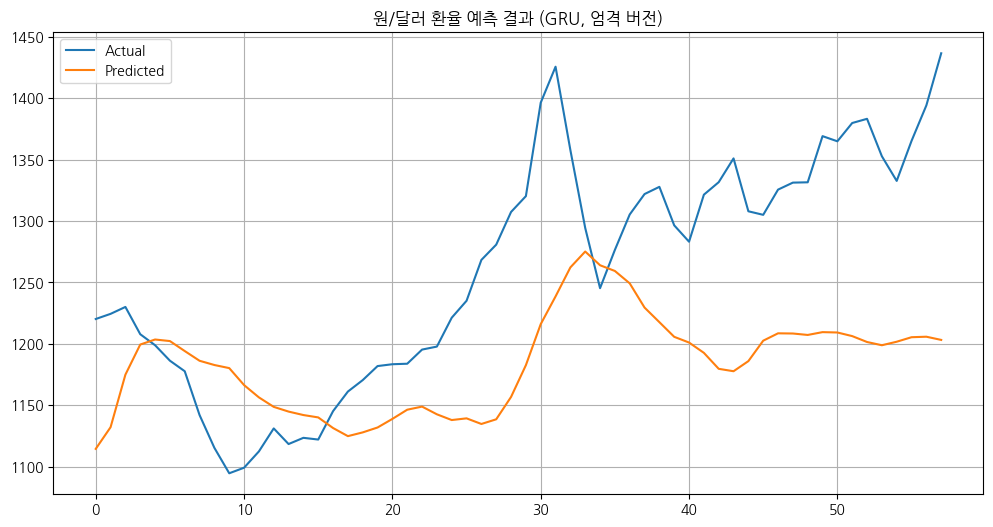

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Ïõê/Îã¨Îü¨ ÌôòÏú® ÏòàÏ∏° Í≤∞Í≥º (GRU, ÏóÑÍ≤© Î≤ÑÏ†Ñ)")
plt.legend()
plt.grid(True)
plt.show()

### Î™®Îç∏ Í∞úÏÑ†

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional

model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

# validation_lossÍ∞Ä 10 epoch ÎèôÏïà Í∞úÏÑ† ÏïàÎêòÎ©¥ ÏûêÎèô Ï¢ÖÎ£åÌïòÍ≥† ÏµúÏ†Å Î™®Îç∏ Î≥µÍµ¨
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ÌïôÏäµ
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 127ms/step - loss: 0.0756 - val_loss: 0.0287
Epoch 2/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - loss: 0.0266 - val_loss: 0.0139
Epoch 3/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step - loss: 0.0176 - val_loss: 0.0059
Epoch 4/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 5/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.0108 - val_loss: 0.0114
Epoch 6/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 7/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 8/100
13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0058 - val_loss: 0.0062
Ep

In [18]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 749ms/step


In [19]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R¬≤: {r2:.4f}")

‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º
MSE: 9728.5623
RMSE: 98.6335
MAE: 83.7983
R¬≤: -0.1173


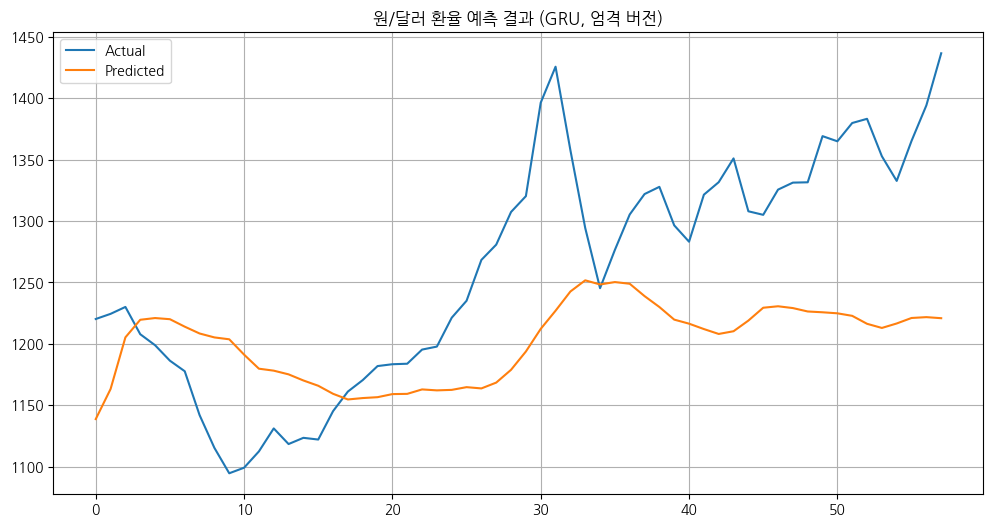

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Ïõê/Îã¨Îü¨ ÌôòÏú® ÏòàÏ∏° Í≤∞Í≥º (GRU, ÏóÑÍ≤© Î≤ÑÏ†Ñ)")
plt.legend()
plt.grid(True)
plt.show()

## Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ïÏúºÎ°ú ÌîºÏ≤ò ÏÑ†ÌÉù

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv('/content/exchange_final.csv')  # ÌååÏùº Í≤ΩÎ°ú ÎßûÏ∂∞Ï§ò
df_fill = df.interpolate(method='linear')
df_fill = df_fill.fillna(method='ffill').fillna(method='bfill')

# 2. ÌîºÏ≤ò, ÌÉÄÍ≤ü Ï†ïÏùò
all_features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
    'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
    'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©',
    'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDP',
    'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'ÌïúÍµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'ÎØ∏Íµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'vix'
]

# ÌÉÄÍ≤ü ÏÉùÏÑ±
df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'] = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®'].shift(-1)
df_fill = df_fill.dropna(subset=all_features + ['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']).reset_index(drop=True)
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'

# 3. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# 4. Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï
selected_features = []
best_r2 = -np.inf

while True:
    candidates = list(set(all_features) - set(selected_features))
    improvement = False
    best_candidate = None
    best_candidate_r2 = -np.inf

    for feature in candidates:
        current_features = selected_features + [feature]

        # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        X = df_fill[current_features]
        y = df_fill[target]

        # ÏãúÌÄÄÏä§ ÏÉùÏÑ±
        seq_length = 12
        X_seq, y_seq = create_sequences(X.values, y.values, seq_length)

        # ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
        split = int(len(X_seq) * 0.8)
        X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
        y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

        # Ïä§ÏºÄÏùºÎßÅ
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        nsamples, timesteps, nfeatures = X_train_raw.shape
        X_train_2d = X_train_raw.reshape((nsamples * timesteps, nfeatures))
        X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, nfeatures))
        y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

        nsamples_test, _, _ = X_test_raw.shape
        X_test_2d = X_test_raw.reshape((nsamples_test * timesteps, nfeatures))
        X_test_scaled = scaler_X.transform(X_test_2d).reshape((nsamples_test, timesteps, nfeatures))
        y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

        # Î™®Îç∏ Ï†ïÏùò
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
            Dropout(0.2),
            GRU(32, return_sequences=True),
            Dropout(0.2),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])

        model.compile(loss='mse', optimizer='adam')

        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        model.fit(
            X_train_scaled, y_train_scaled,
            epochs=30, batch_size=16,
            validation_split=0.1,
            callbacks=[early_stop],
            verbose=0
        )

        # ÌèâÍ∞Ä
        y_pred_scaled = model.predict(X_test_scaled, verbose=0)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = scaler_y.inverse_transform(y_test_scaled)

        r2 = r2_score(y_true, y_pred)

        if r2 > best_candidate_r2:
            best_candidate_r2 = r2
            best_candidate = feature

    if best_candidate_r2 > best_r2:
        selected_features.append(best_candidate)
        best_r2 = best_candidate_r2
        print(f"‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: {best_candidate}, ÌòÑÏû¨ R¬≤: {best_r2:.4f}")
        improvement = True
    else:
        break

print("\nüéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:")
for f in selected_features:
    print(f"- {f}")
print(f"\nüìà ÏµúÏ¢Ö R¬≤: {best_r2:.4f}")

‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: ÏÜåÎß• Í∞ÄÍ≤©, ÌòÑÏû¨ R¬≤: 0.0895
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Ïò•ÏàòÏàò Í∞ÄÍ≤©, ÌòÑÏû¨ R¬≤: 0.1104
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©, ÌòÑÏû¨ R¬≤: 0.1137

üéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:
- ÏÜåÎß• Í∞ÄÍ≤©
- Ïò•ÏàòÏàò Í∞ÄÍ≤©
- Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©

üìà ÏµúÏ¢Ö R¬≤: 0.1137



üéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•
R¬≤: -1.9054
RMSE: 159.0510
MSE: 25297.2171
MAE: 133.8555


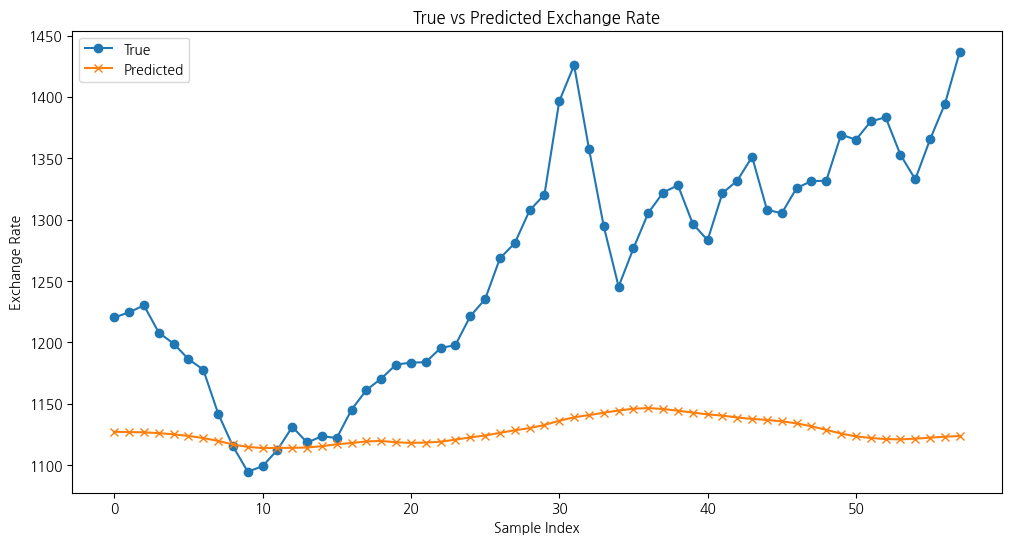

In [25]:
# ======= Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï ÎÅùÎÇòÍ≥† Ï∂îÍ∞Ä =======

# ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú featureÎßåÏúºÎ°ú Îã§Ïãú ÌïôÏäµ
final_features = selected_features.copy()

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df_fill[final_features]
y = df_fill[target]

# ÏãúÌÄÄÏä§ ÏÉùÏÑ±
seq_length = 12
X_seq, y_seq = create_sequences(X.values, y.values, seq_length)

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

# Ïä§ÏºÄÏùºÎßÅ
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

nsamples, timesteps, nfeatures = X_train_raw.shape
X_train_2d = X_train_raw.reshape((nsamples * timesteps, nfeatures))
X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, nfeatures))
y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

nsamples_test, _, _ = X_test_raw.shape
X_test_2d = X_test_raw.reshape((nsamples_test * timesteps, nfeatures))
X_test_scaled = scaler_X.transform(X_test_2d).reshape((nsamples_test, timesteps, nfeatures))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# Î™®Îç∏ Ïû¨Ï†ïÏùò
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train_scaled,
    epochs=30, batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=0
)

# ÏòàÏ∏°
y_pred_scaled = model.predict(X_test_scaled, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

# ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nüéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•")
print(f"R¬≤: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# ÏòàÏ∏° vs Ïã§Ï†ú Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(y_true, label='True', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('True vs Predicted Exchange Rate')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### ÏóÖÍ∑∏Î†àÏù¥Îìú

- Validation set Í≥†Ï†ï: feature Ï∂îÍ∞ÄÌï† Îïå Îß§Î≤à ÏÉàÎ°≠Í≤å ÌïôÏäµ & Í≥†Ï†ïÎêú Í≤ÄÏ¶ùÏÖãÏóêÏÑú ÌèâÍ∞Ä

- ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä: Îî∞Î°ú Î∂ÑÎ¶¨Îêú Test set Í∏∞Ï§ÄÏúºÎ°ú ÏµúÏ¢Ö ÏÑ±Îä• ÌèâÍ∞Ä

- EarlyStopping Í∞ïÌôî: patience=3, epochs=20 ‚Üí Í≥ºÏ†ÅÌï© Î∞©ÏßÄ & Îπ†Î•∏ ÏàòÎ†¥

- Random Seed Í≥†Ï†ï: ÏôÑÎ≤ΩÌûà Í≥†Ï†ï (Python, Numpy, Tensorflow)

‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Ïã§ÏßàGDPÏÑ±Ïû•Î•†, ÌòÑÏû¨ R¬≤: 0.7003
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ, ÌòÑÏû¨ R¬≤: 0.7639
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: ÌïúÍµ≠ Ïã§ÏóÖÎ•†, ÌòÑÏû¨ R¬≤: 0.8045
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò, ÌòÑÏû¨ R¬≤: 0.8242

üéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:
- Ïã§ÏßàGDPÏÑ±Ïû•Î•†
- ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ
- ÌïúÍµ≠ Ïã§ÏóÖÎ•†
- Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò

üéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•
R¬≤: -4.2562
RMSE: 213.9286
MSE: 45765.4381
MAE: 181.6025


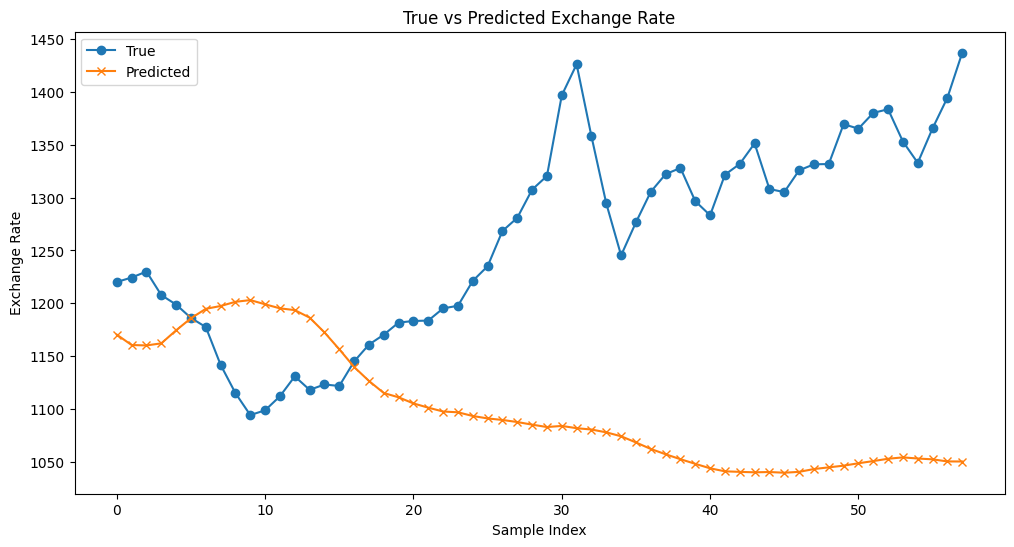

In [2]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# 1. ÎûúÎç§ Í≥†Ï†ï
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv('/content/exchange_final.csv')
df_fill = df.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

all_features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
    'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
    'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©',
    'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDP',
    'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'ÌïúÍµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'ÎØ∏Íµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'vix'
]

df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'] = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®'].shift(-1)
df_fill = df_fill.dropna(subset=all_features + ['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']).reset_index(drop=True)
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'

# 3. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# 4. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_full = df_fill[all_features].values
y_full = df_fill[target].values

seq_length = 12
X_seq, y_seq = create_sequences(X_full, y_full, seq_length)

split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

# 5. Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï
selected_features = []
best_r2 = -np.inf

while True:
    candidates = list(set(all_features) - set(selected_features))
    improvement = False
    best_candidate = None
    best_candidate_r2 = -np.inf

    for feature in candidates:
        current_features = selected_features + [feature]

        # ÏÑ†ÌÉùÎêú featureÎ°ú Îã§Ïãú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
        idx = [all_features.index(f) for f in current_features]

        # Ïä§ÏºÄÏùºÎßÅ
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        nsamples, timesteps, nfeatures = X_train_raw.shape
        X_train_2d = X_train_raw[:, :, idx].reshape((nsamples * timesteps, len(current_features)))
        X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, len(current_features)))
        y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

        # validation set ÎßåÎì§Í∏∞
        split_val = int(len(X_train_scaled) * 0.9)
        X_train_final, X_val_final = X_train_scaled[:split_val], X_train_scaled[split_val:]
        y_train_final, y_val_final = y_train_scaled[:split_val], y_train_scaled[split_val:]

        # Î™®Îç∏ Ï†ïÏùò
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
            Dropout(0.2),
            GRU(32, return_sequences=True),
            Dropout(0.2),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])

        model.compile(loss='mse', optimizer='adam')
        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        model.fit(
            X_train_final, y_train_final,
            epochs=20, batch_size=16,
            validation_data=(X_val_final, y_val_final),
            callbacks=[early_stop],
            verbose=0
        )

        # ÌèâÍ∞Ä
        y_val_pred_scaled = model.predict(X_val_final, verbose=0)
        y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
        y_val_true = scaler_y.inverse_transform(y_val_final)

        r2 = r2_score(y_val_true, y_val_pred)

        if r2 > best_candidate_r2:
            best_candidate_r2 = r2
            best_candidate = feature

    if best_candidate_r2 > best_r2:
        selected_features.append(best_candidate)
        best_r2 = best_candidate_r2
        print(f"‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: {best_candidate}, ÌòÑÏû¨ R¬≤: {best_r2:.4f}")
    else:
        break

print("\nüéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:")
for f in selected_features:
    print(f"- {f}")

# 6. ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä (Test set)
idx = [all_features.index(f) for f in selected_features]

# Ïä§ÏºÄÏùºÎßÅ
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_2d = X_train_raw[:, :, idx].reshape((X_train_raw.shape[0]*X_train_raw.shape[1], len(selected_features)))
X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((X_train_raw.shape[0], X_train_raw.shape[1], len(selected_features)))

y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

X_test_2d = X_test_raw[:, :, idx].reshape((X_test_raw.shape[0]*X_test_raw.shape[1], len(selected_features)))
X_test_scaled = scaler_X.transform(X_test_2d).reshape((X_test_raw.shape[0], X_test_raw.shape[1], len(selected_features)))

y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# Î™®Îç∏ Ïû¨Ï†ïÏùò
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train_scaled,
    epochs=20, batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=0
)

# ÏµúÏ¢Ö ÏòàÏ∏°
y_pred_scaled = model.predict(X_test_scaled, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

# ÏµúÏ¢Ö ÏÑ±Îä• Ï∂úÎ†•
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nüéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•")
print(f"R¬≤: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(y_true, label='True', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('True vs Predicted Exchange Rate')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


# rmse Î°ú Îã§ÏãúÎ≥¥Í∏∞

‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Ïã§ÏßàGDPÏÑ±Ïû•Î•†, ÌòÑÏû¨ RMSE: 20.7570
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ, ÌòÑÏû¨ RMSE: 18.4239
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: ÌïúÍµ≠ Ïã§ÏóÖÎ•†, ÌòÑÏû¨ RMSE: 16.7663
‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò, ÌòÑÏû¨ RMSE: 15.8968

üéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:
- Ïã§ÏßàGDPÏÑ±Ïû•Î•†
- ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ
- ÌïúÍµ≠ Ïã§ÏóÖÎ•†
- Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò

üéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•
R¬≤: -4.2562
RMSE: 213.9286
MSE: 45765.4381
MAE: 181.6025


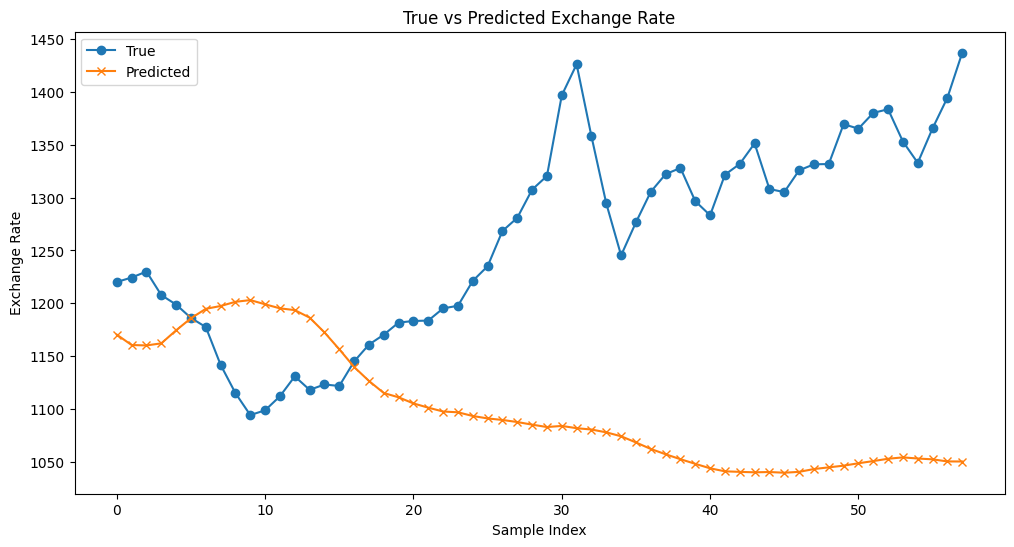

In [3]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# 1. ÎûúÎç§ Í≥†Ï†ï
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv('/content/exchange_final.csv')
df_fill = df.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

all_features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
    'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
    'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©',
    'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDP',
    'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'ÌïúÍµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'ÎØ∏Íµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'vix'
]

df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'] = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®'].shift(-1)
df_fill = df_fill.dropna(subset=all_features + ['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']).reset_index(drop=True)
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'

# 3. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# 4. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_full = df_fill[all_features].values
y_full = df_fill[target].values

seq_length = 12
X_seq, y_seq = create_sequences(X_full, y_full, seq_length)

split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

# 5. Ï†ÑÏßÑ ÏÑ†ÌÉùÎ≤ï
selected_features = []
best_rmse = np.inf

while True:
    candidates = list(set(all_features) - set(selected_features))
    improvement = False
    best_candidate = None
    best_candidate_rmse = np.inf

    for feature in candidates:
        current_features = selected_features + [feature]

        # ÏÑ†ÌÉùÎêú featureÎ°ú Îã§Ïãú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
        idx = [all_features.index(f) for f in current_features]

        # Ïä§ÏºÄÏùºÎßÅ
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        nsamples, timesteps, nfeatures = X_train_raw.shape
        X_train_2d = X_train_raw[:, :, idx].reshape((nsamples * timesteps, len(current_features)))
        X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, len(current_features)))
        y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

        # validation set ÎßåÎì§Í∏∞
        split_val = int(len(X_train_scaled) * 0.9)
        X_train_final, X_val_final = X_train_scaled[:split_val], X_train_scaled[split_val:]
        y_train_final, y_val_final = y_train_scaled[:split_val], y_train_scaled[split_val:]

        # Î™®Îç∏ Ï†ïÏùò
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
            Dropout(0.2),
            GRU(32, return_sequences=True),
            Dropout(0.2),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])

        model.compile(loss='mse', optimizer='adam')
        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        model.fit(
            X_train_final, y_train_final,
            epochs=20, batch_size=16,
            validation_data=(X_val_final, y_val_final),
            callbacks=[early_stop],
            verbose=0
        )

        # ÌèâÍ∞Ä
        y_val_pred_scaled = model.predict(X_val_final, verbose=0)
        y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
        y_val_true = scaler_y.inverse_transform(y_val_final)

        rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

        if rmse < best_candidate_rmse:
            best_candidate_rmse = rmse
            best_candidate = feature

    if best_candidate_rmse < best_rmse:
        selected_features.append(best_candidate)
        best_rmse = best_candidate_rmse
        print(f"‚úÖ Ï∂îÍ∞ÄÎêú ÌîºÏ≤ò: {best_candidate}, ÌòÑÏû¨ RMSE: {best_rmse:.4f}")
    else:
        break

print("\nüéØ ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏:")
for f in selected_features:
    print(f"- {f}")

# 6. ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä (Test set)
idx = [all_features.index(f) for f in selected_features]

# Ïä§ÏºÄÏùºÎßÅ
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_2d = X_train_raw[:, :, idx].reshape((X_train_raw.shape[0]*X_train_raw.shape[1], len(selected_features)))
X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((X_train_raw.shape[0], X_train_raw.shape[1], len(selected_features)))

y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

X_test_2d = X_test_raw[:, :, idx].reshape((X_test_raw.shape[0]*X_test_raw.shape[1], len(selected_features)))
X_test_scaled = scaler_X.transform(X_test_2d).reshape((X_test_raw.shape[0], X_test_raw.shape[1], len(selected_features)))

y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# Î™®Îç∏ Ïû¨Ï†ïÏùò
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train_scaled,
    epochs=20, batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=0
)

# ÏµúÏ¢Ö ÏòàÏ∏°
y_pred_scaled = model.predict(X_test_scaled, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_scaled)

# ÏµúÏ¢Ö ÏÑ±Îä• Ï∂úÎ†•
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nüéØ ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä•")
print(f"R¬≤: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(y_true, label='True', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('True vs Predicted Exchange Rate')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

üöÄ A Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ A Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -4.0355
RMSE: 209.3885
MSE: 43843.5585
MAE: 173.2547


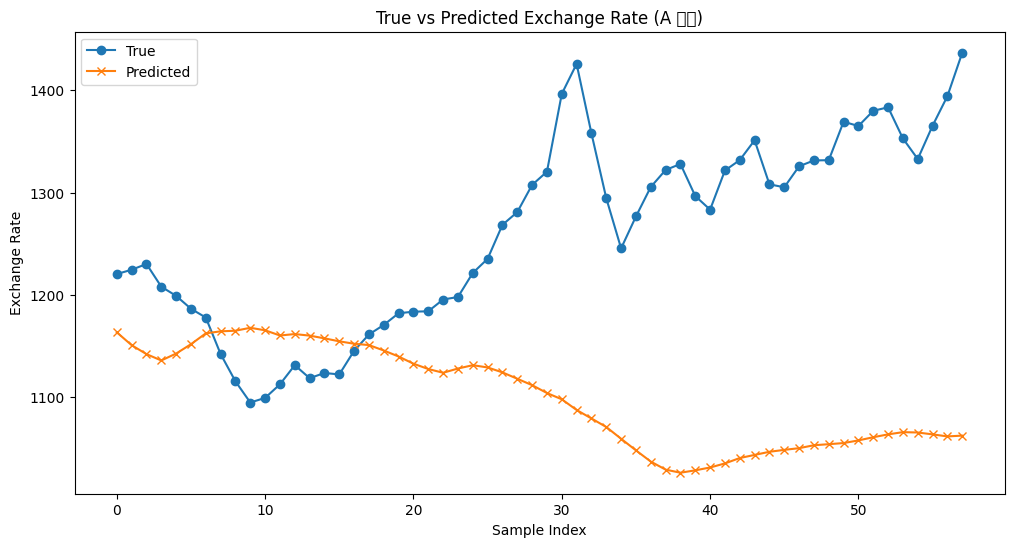

--------------------------------------------------
üöÄ B Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ B Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -4.8766
RMSE: 226.2009
MSE: 51166.8348
MAE: 192.9245


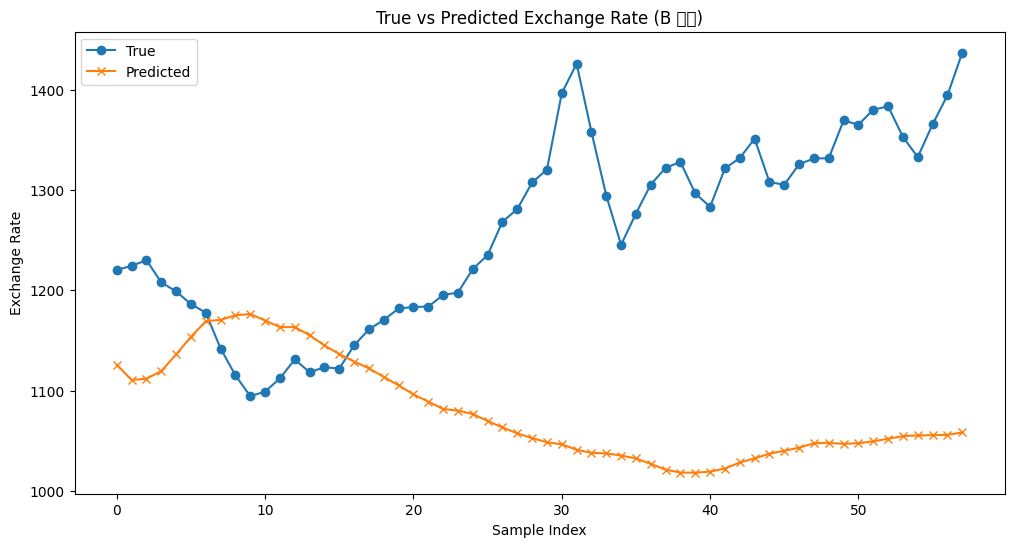

--------------------------------------------------
üöÄ C Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -3.9610
RMSE: 207.8338
MSE: 43194.9059
MAE: 178.3607


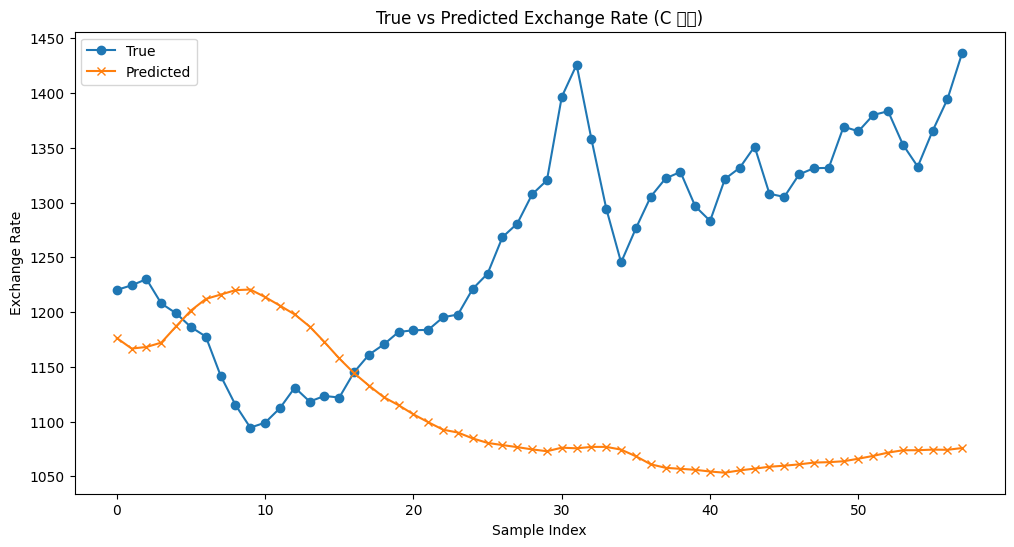

--------------------------------------------------
üöÄ D Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ D Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -4.5426
RMSE: 219.6796
MSE: 48259.1415
MAE: 183.5286


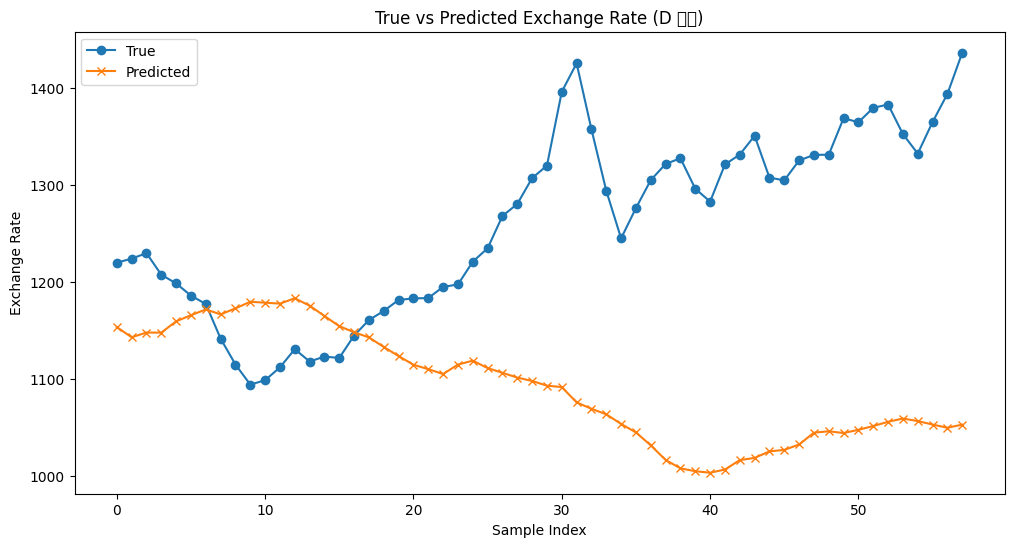

--------------------------------------------------


In [10]:
# ÌäúÎãù Î≤ÑÏ†ÑÎ≥Ñ Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
def build_model(version, input_shape):
    tf.random.set_seed(42)
    if version == 'A':
        model = Sequential([
            Bidirectional(GRU(32, return_sequences=True), input_shape=input_shape),
            Dropout(0.2),
            GRU(16, return_sequences=True),
            Dropout(0.2),
            GRU(8),
            Dense(32, activation='relu'),
            Dense(1)
        ])

    elif version == 'B':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.2),
            GRU(64, return_sequences=True),
            Dropout(0.2),
            GRU(32),
            Dense(32, activation='relu'),
            Dense(1)
        ])

    elif version == 'C':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.3),
            GRU(32, return_sequences=True),
            Dropout(0.3),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])

    elif version == 'D':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.2),
            GRU(32),
            Dense(32, activation='relu'),
            Dense(1)
        ])

    else:
        raise ValueError("Invalid version name. Choose from ['A', 'B', 'C', 'D']")

    model.compile(optimizer='adam', loss='mse')
    return model

# ÌäúÎãù Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_model(version, X_train, y_train, X_test, y_test):
    print(f'üöÄ {version} Î™®Îç∏ ÌïôÏäµ ÏãúÏûë')

    model = build_model(version, input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=16,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False  # ‚≠ê Ï∂îÍ∞Ä!!!
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ {version} Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ Ï∂îÍ∞Ä!
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title(f'True vs Predicted Exchange Rate ({version} Î™®Îç∏)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model


# X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled ÏÇ¨Ïö©
# A ~ D Î≤ÑÏ†Ñ Î™®Îëê Ïã§Ìñâ
for version in ['A', 'B', 'C', 'D']:
    train_and_evaluate_model(version, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

### CÎ≤ÑÏ†ÑÏù¥ Í∑∏ÎÇòÎßà ÎÇòÏùå (Dropout Í∞ïÌôî Î≤ÑÏ†Ñ)

Í∏∞Î∞òÏúºÎ°ú Îã§Ïãú ÌäúÎãù

üöÄ C1 Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C1 Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -5.0045
RMSE: 228.6494
MSE: 52280.5414
MAE: 191.7292


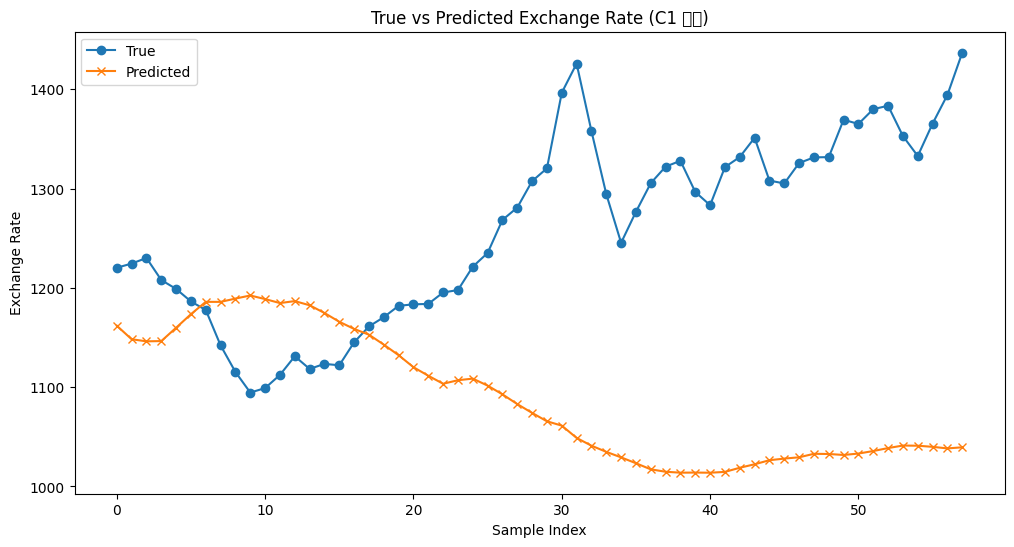

--------------------------------------------------
üöÄ C2 Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C2 Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -3.5363
RMSE: 198.7393
MSE: 39497.3057
MAE: 165.8923


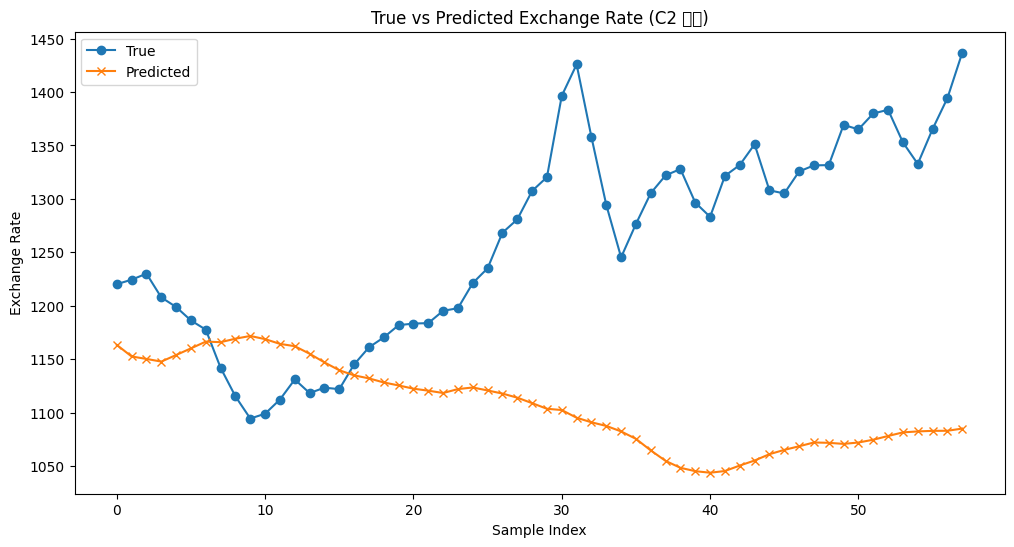

--------------------------------------------------
üöÄ C3 Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C3 Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -2.4306
RMSE: 172.8295
MSE: 29870.0514
MAE: 144.0536


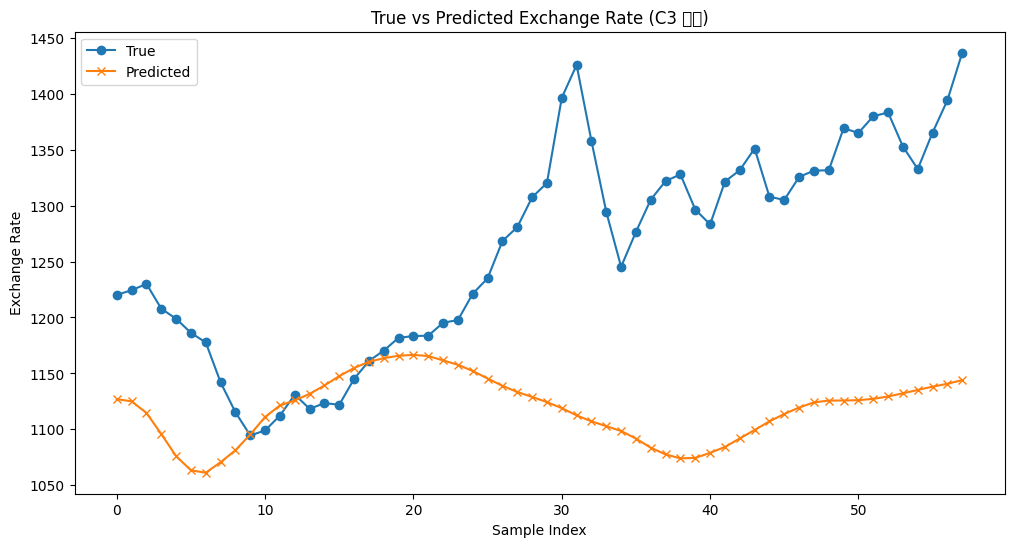

--------------------------------------------------
üöÄ C4 Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C4 Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -4.5758
RMSE: 220.3361
MSE: 48547.9956
MAE: 185.5572


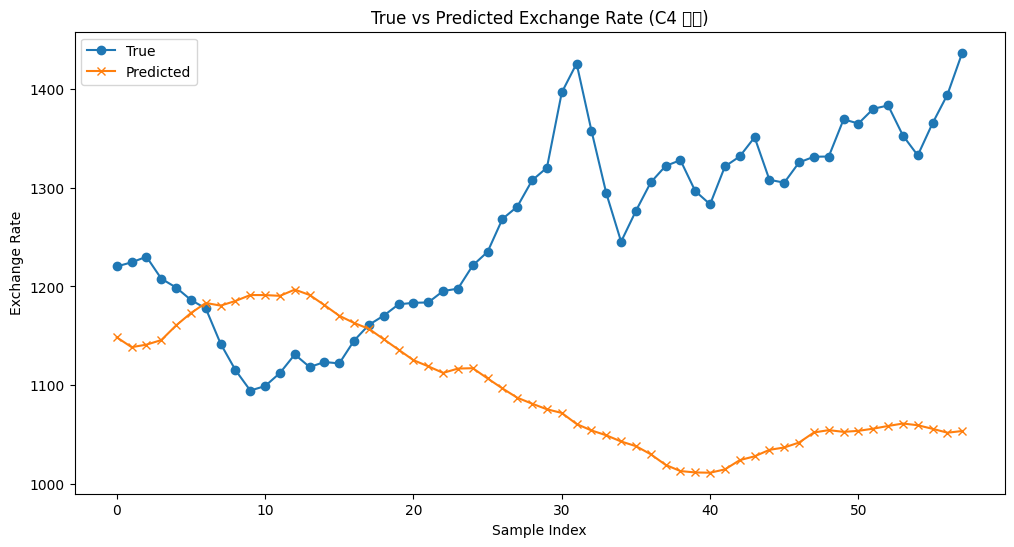

--------------------------------------------------
üöÄ C5 Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ C5 Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•
R¬≤: -3.7020
RMSE: 202.3369
MSE: 40940.2103
MAE: 166.1435


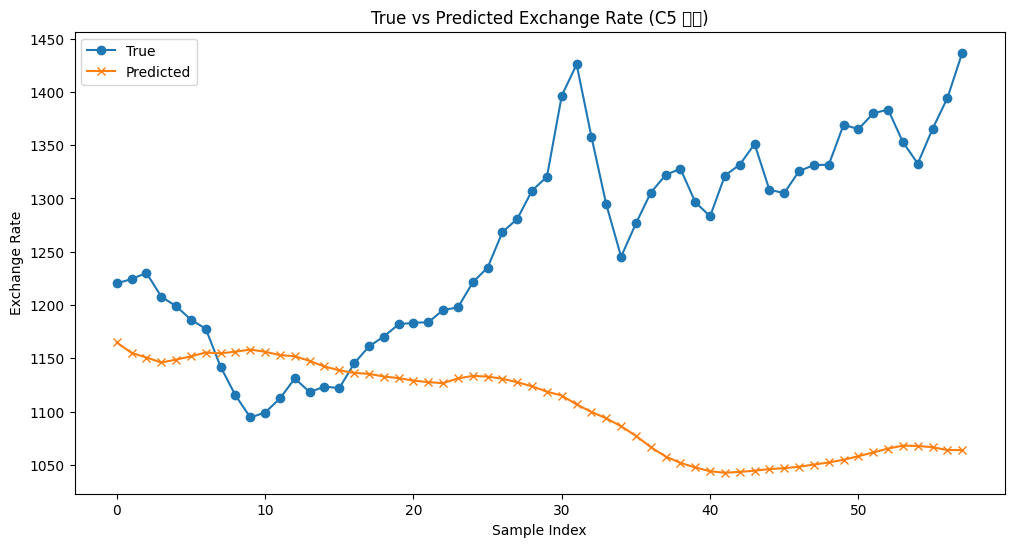

--------------------------------------------------


In [11]:
# ÌäúÎãù Î≤ÑÏ†ÑÎ≥Ñ Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò (Ï∂îÍ∞Ä ÌäúÎãù Î≤ÑÏ†Ñ)
def build_c_model(version, input_shape):
    tf.random.set_seed(42)  # Î™®Îç∏ ÎßåÎì§ ÎïåÎèÑ ÏãúÎìú Í≥†Ï†ï

    if version == 'C1':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.4),
            GRU(32, return_sequences=True),
            Dropout(0.4),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam()
        batch_size = 16
        epochs = 20

    elif version == 'C2':
        model = Sequential([
            Bidirectional(GRU(48, return_sequences=True), input_shape=input_shape),
            Dropout(0.3),
            GRU(24, return_sequences=True),
            Dropout(0.3),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam()
        batch_size = 16
        epochs = 20

    elif version == 'C3':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.3),
            GRU(32, return_sequences=True),
            Dropout(0.3),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam()
        batch_size = 32  # batch size ÌÅ¨Í≤å
        epochs = 20

    elif version == 'C4':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.3),
            GRU(32, return_sequences=True),
            Dropout(0.3),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # learning rate ÎÇÆÏ∂§
        batch_size = 16
        epochs = 20

    elif version == 'C5':
        model = Sequential([
            Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
            Dropout(0.3),
            GRU(32, return_sequences=True),
            Dropout(0.3),
            GRU(16),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        optimizer = tf.keras.optimizers.Adam()
        batch_size = 16
        epochs = 40  # ÏóêÌè≠ Ï¶ùÍ∞Ä

    else:
        raise ValueError("Invalid version name. Choose from ['C1', 'C2', 'C3', 'C4', 'C5']")

    model.compile(optimizer=optimizer, loss='mse')
    return model, batch_size, epochs

# ÌäúÎãù Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_c_model(version, X_train, y_train, X_test, y_test):
    print(f'üöÄ {version} Î™®Îç∏ ÌïôÏäµ ÏãúÏûë')

    model, batch_size, epochs = build_c_model(version, input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False  # ÎûúÎç§ ÏôÑÏ†Ñ Í≥†Ï†ï
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ {version} Î™®Îç∏ ÏµúÏ¢Ö ÏÑ±Îä•")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title(f'True vs Predicted Exchange Rate ({version} Î™®Îç∏)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïó¨Í∏∞ÍπåÏßÄ ÏÑ∏ÌåÖÌïú ÌõÑ ==========

# C1 ~ C5 Î≤ÑÏ†Ñ Î™®Îëê Ïã§Ìñâ
for version in ['C1', 'C2', 'C3', 'C4', 'C5']:
    train_and_evaluate_c_model(version, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### C3Ïóê Learning Rate Decay Ï†ÅÏö©

üöÄ C3 Î™®Îç∏ (Learning Rate Decay Ï†ÅÏö©) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (C3 + Learning Rate Decay)
R¬≤: -3.0704
RMSE: 188.2561
MSE: 35440.3498
MAE: 152.8329


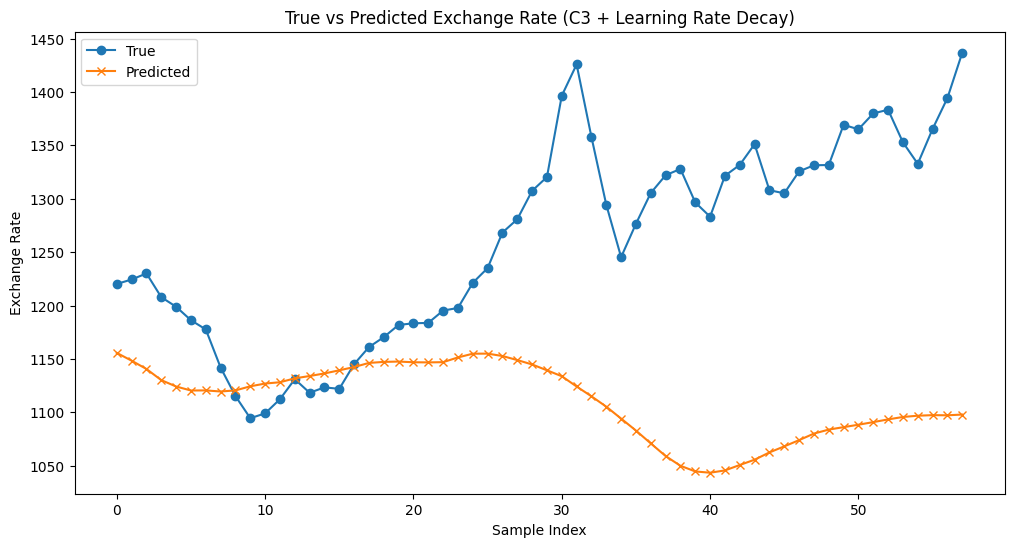

--------------------------------------------------


<Sequential name=sequential_330, built=True>

In [12]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò (C3 Í∏∞Î∞ò)
def build_c3_with_lr_decay(input_shape):
    tf.random.set_seed(42)  # Î™®Îç∏ ÎÇ¥Î∂Ä ÎûúÎç§ Í≥†Ï†ï

    model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        GRU(32, return_sequences=True),
        Dropout(0.3),
        GRU(16),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Learning Rate Scheduler
    lr_schedule = ExponentialDecay(
        initial_learning_rate=0.001,  # ÏãúÏûë learning rate
        decay_steps=100,              # Î™á Ïä§ÌÖùÎßàÎã§ Í∞êÏÜåÌï†ÏßÄ
        decay_rate=0.9,               # Í∞êÏÜå ÎπÑÏú® (90%Î°ú Í∞êÏÜå)
        staircase=True                # TrueÎ©¥ ÍπîÎÅîÌïòÍ≤å Í≥ÑÎã®ÏãùÏúºÎ°ú Í∞êÏÜå
    )

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_c3_lr_decay(X_train, y_train, X_test, y_test):
    print(f'üöÄ C3 Î™®Îç∏ (Learning Rate Decay Ï†ÅÏö©) ÌïôÏäµ ÏãúÏûë')

    model = build_c3_with_lr_decay(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=30,  # Ï°∞Í∏à Ïó¨Ïú† ÏûàÍ≤å 30ÍπåÏßÄ ÏÑ§Ï†ï (EarlyStopping ÏûëÎèôÌïòÎãàÍπå Í±±Ï†ï X)
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False  # ÏãúÎìú ÏôÑÏ†Ñ Í≥†Ï†ï
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (C3 + Learning Rate Decay)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (C3 + Learning Rate Decay)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_c3_lr_decay(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### C3Î™®Îç∏ÏóêÏÑú Bidirectional GRUÎ•º Ï†úÍ±∞(Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)

üöÄ C3 Îã®Î∞©Ìñ• GRU Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (C3 Îã®Î∞©Ìñ• GRU)
R¬≤: -3.8415
RMSE: 205.3159
MSE: 42154.6014
MAE: 166.3180


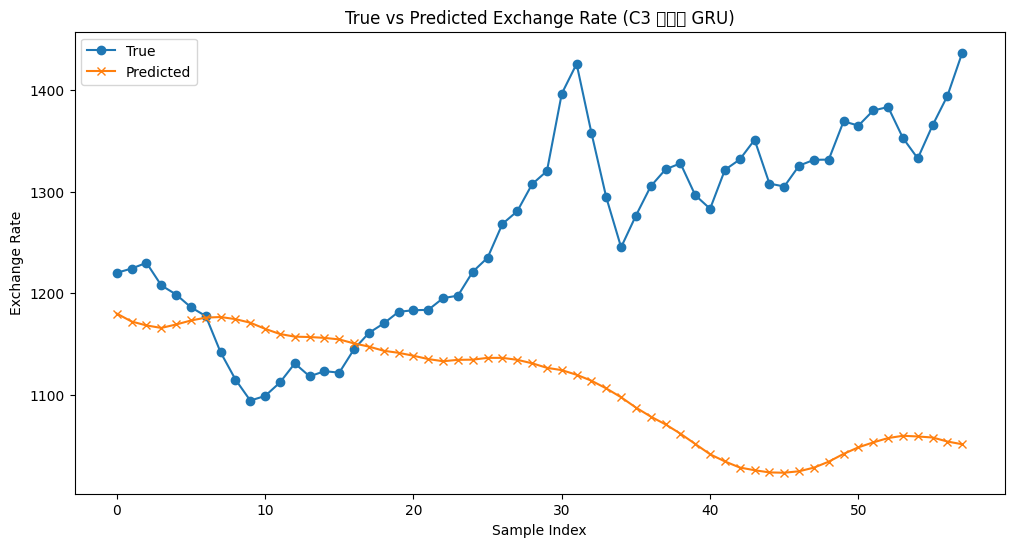

--------------------------------------------------


<Sequential name=sequential_331, built=True>

In [13]:
# Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò (C3 Í∏∞Î∞ò Îã®Î∞©Ìñ• GRU Î≤ÑÏ†Ñ)
def build_c3_unidirectional(input_shape):
    tf.random.set_seed(42)  # ÎûúÎç§ Í≥†Ï†ï

    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(32, return_sequences=True),
        Dropout(0.3),
        GRU(16),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_c3_unidirectional(X_train, y_train, X_test, y_test):
    print(f'üöÄ C3 Îã®Î∞©Ìñ• GRU Î™®Îç∏ ÌïôÏäµ ÏãúÏûë')

    model = build_c3_unidirectional(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (C3 Îã®Î∞©Ìñ• GRU)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (C3 Îã®Î∞©Ìñ• GRU)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_c3_unidirectional(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Conv1D Ï∂îÍ∞Ä

üöÄ Conv1D + GRU Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Conv1D + GRU)
R¬≤: -3.6868
RMSE: 202.0083
MSE: 40807.3581
MAE: 168.6336


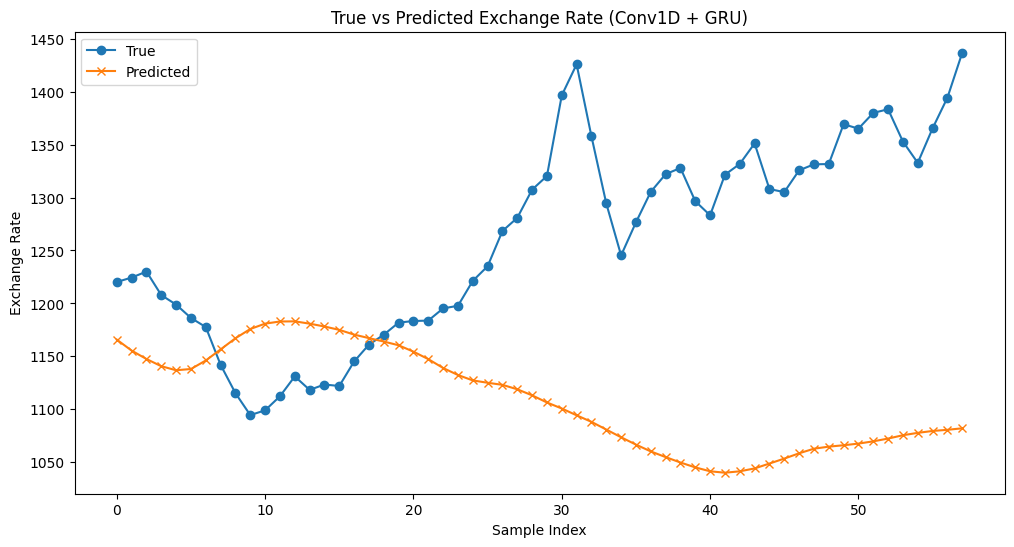

--------------------------------------------------


<Sequential name=sequential_332, built=True>

In [15]:
from tensorflow.keras.layers import Conv1D

# Conv1D + GRU Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
def build_conv1d_gru_model(input_shape):
    tf.random.set_seed(42)  # ÎûúÎç§ Í≥†Ï†ï

    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32, return_sequences=True),
        Dropout(0.3),
        GRU(16),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_conv1d_gru(X_train, y_train, X_test, y_test):
    print(f'üöÄ Conv1D + GRU Î™®Îç∏ ÌïôÏäµ ÏãúÏûë')

    model = build_conv1d_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Conv1D + GRU)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (Conv1D + GRU)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_conv1d_gru(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Mini transformer

üöÄ Mini Transformer Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer)
R¬≤: -1.1130
RMSE: 135.6380
MSE: 18397.6725
MAE: 117.1328


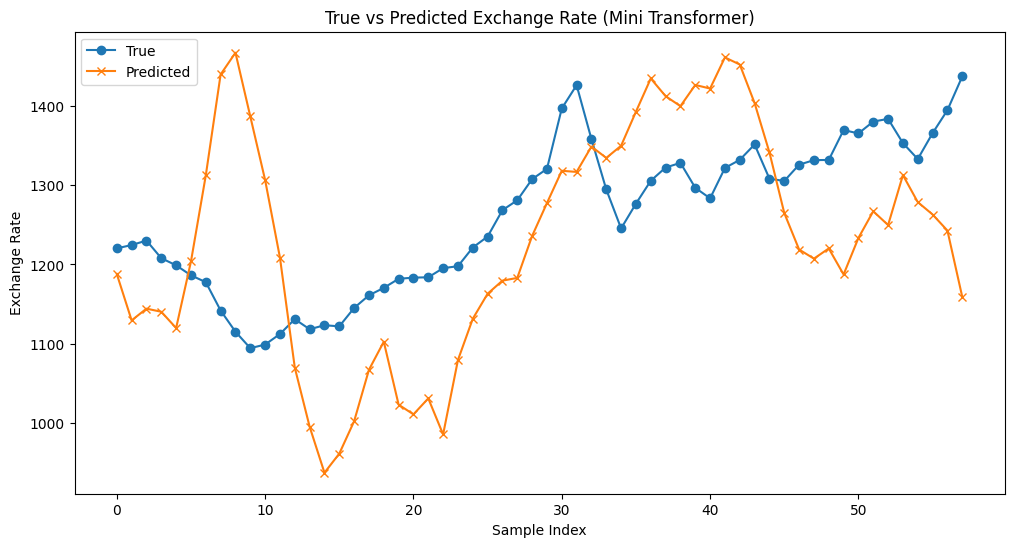

--------------------------------------------------


<Functional name=functional_343, built=True>

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model

os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Self Attention
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Ï†ÑÏ≤¥ Transformer Î™®Îç∏
def build_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    # Transformer Ïù∏ÏΩîÎçî 1Ï∏µ
    x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)

    # Flatten ÌõÑ ÏòàÏ∏°
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Mini Transformer Î™®Îç∏ ÌïôÏäµ ÏãúÏûë')

    model = build_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (Mini Transformer)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


üöÄ Mini Transformer (Í∞úÏÑ†Î≤ÑÏ†Ñ + Ïû¨ÌòÑÏÑ± Í≥†Ï†ï) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Í∞úÏÑ†Îêú Mini Transformer)
R¬≤: -1.7336
RMSE: 154.2769
MSE: 23801.3490
MAE: 135.3642


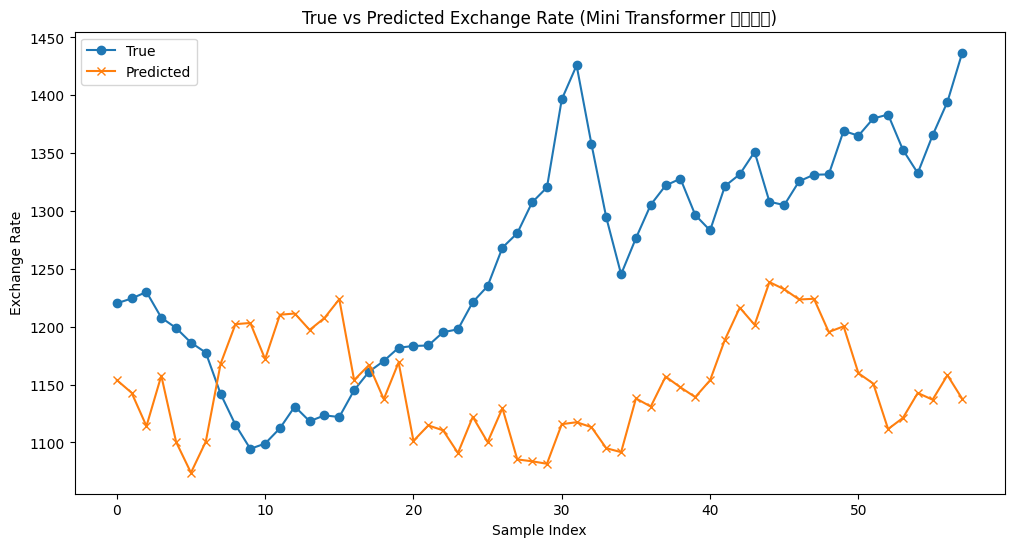

--------------------------------------------------


<Functional name=functional_341, built=True>

In [24]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. ÏôÑÏ†Ñ ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# 3. Ï†ÑÏ≤¥ Î™®Îç∏ Íµ¨ÏÑ±
def build_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)

    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# 4. ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Mini Transformer (Í∞úÏÑ†Î≤ÑÏ†Ñ + Ïû¨ÌòÑÏÑ± Í≥†Ï†ï) ÌïôÏäµ ÏãúÏûë')

    model = build_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False  # ‚≠ê Î∞òÎìúÏãú Í≥†Ï†ï
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Í∞úÏÑ†Îêú Mini Transformer)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (Mini Transformer Í∞úÏÑ†Î≤ÑÏ†Ñ)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Í∏∞Î≥∏ Mini Transformer Î≤ÑÏ†Ñ Í∞úÏÑ†

üöÄ Mini Transformer (ÎØ∏ÏÑ∏ ÌäúÎãù Î≤ÑÏ†Ñ) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer ÎØ∏ÏÑ∏ ÌäúÎãù)
R¬≤: -3.8476
RMSE: 205.4454
MSE: 42207.8027
MAE: 166.2909


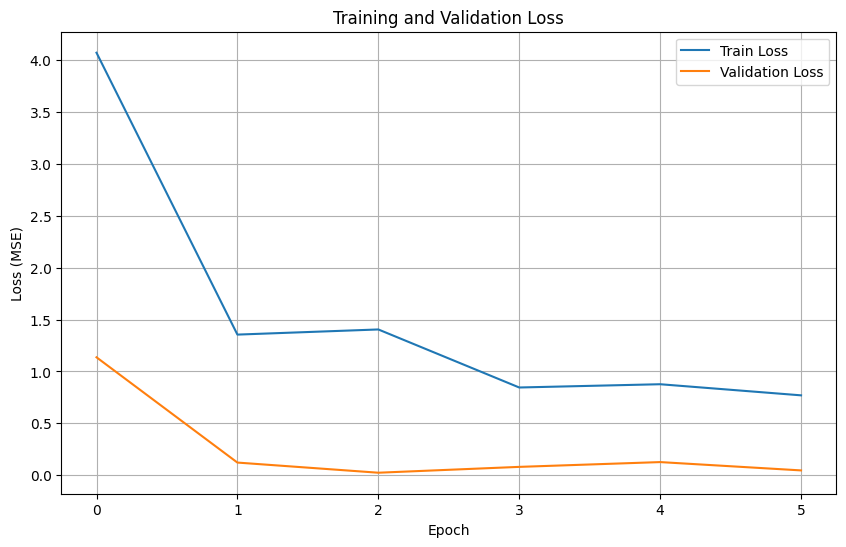

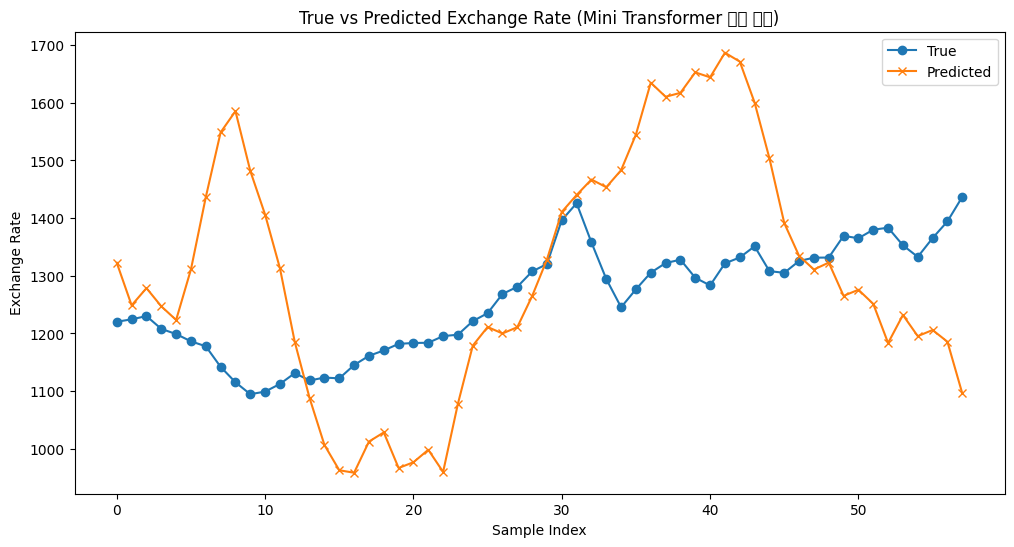

--------------------------------------------------


<Functional name=functional_344, built=True>

In [27]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. ÏôÑÏ†Ñ ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):  # ‚≠ê dropout 0.2Î°ú Î≥ÄÍ≤Ω
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# 3. Ï†ÑÏ≤¥ Î™®Îç∏ Íµ¨ÏÑ±
def build_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    # Transformer 2Ï∏µ Íµ¨ÏÑ±
    x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.2)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.2)

    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # ‚≠ê learning rate 0.0005Î°ú ÎÇÆÏ∂§
    model.compile(optimizer=optimizer, loss='mse')

    return model

# 4. ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Mini Transformer (ÎØ∏ÏÑ∏ ÌäúÎãù Î≤ÑÏ†Ñ) ÌïôÏäµ ÏãúÏûë')

    model = build_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # ‚≠ê history Ï†ÄÏû•
    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer ÎØ∏ÏÑ∏ ÌäúÎãù)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # ‚≠ê Ï∂îÍ∞Ä: loss, val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (Mini Transformer ÎØ∏ÏÑ∏ ÌäúÎãù)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Mini Transformer Ï≤´ Î≤ÑÏ†Ñ loss Í∑∏ÎûòÌîÑ Îã§ÏãúÌôïÏù∏

üöÄ Mini Transformer (Í∏∞Î≥∏ Î≤ÑÏ†Ñ) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer Í∏∞Î≥∏ Î≤ÑÏ†Ñ)
R¬≤: -1.1130
RMSE: 135.6380
MSE: 18397.6725
MAE: 117.1328


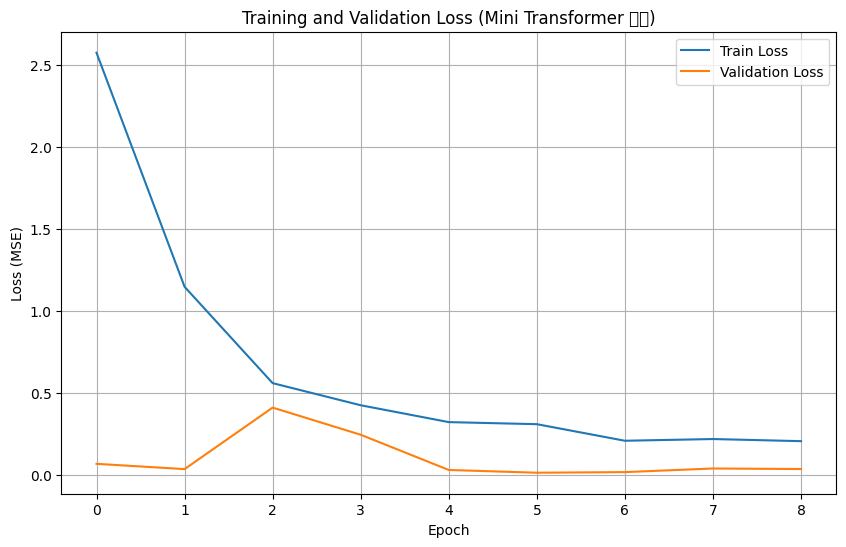

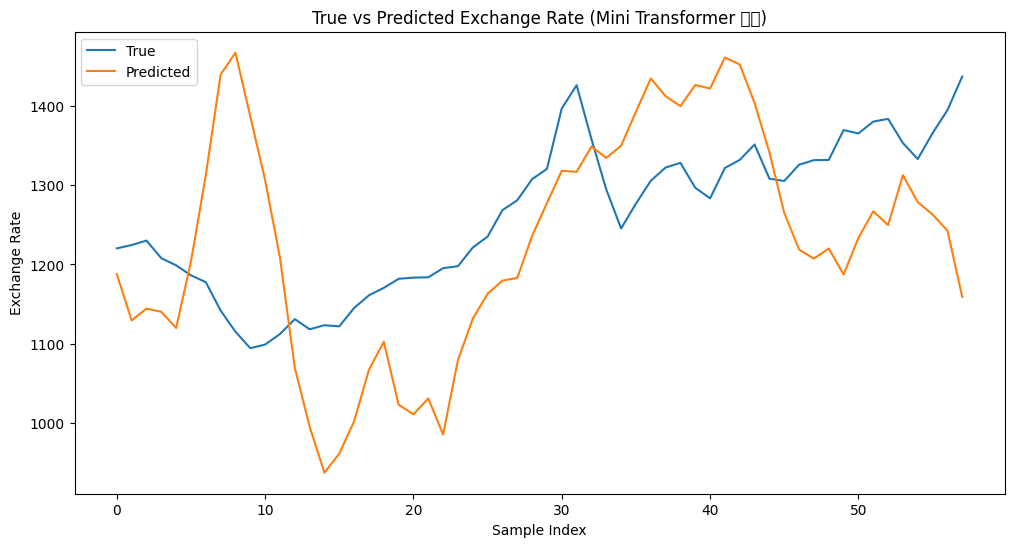

--------------------------------------------------


<Functional name=functional_346, built=True>

In [29]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Î™®Îç∏ Íµ¨ÏÑ±
def build_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)

    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Mini Transformer (Í∏∞Î≥∏ Î≤ÑÏ†Ñ) ÌïôÏäµ ÏãúÏûë')

    model = build_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer Í∏∞Î≥∏ Î≤ÑÏ†Ñ)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (Mini Transformer Í∏∞Î≥∏)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title('True vs Predicted Exchange Rate (Mini Transformer Í∏∞Î≥∏)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


# ÎÑàÎ¨¥ Î≥ÄÏàòÍ∞Ä Ï†ÅÏùÄ Í≤É ÏïÑÎãêÍπå?

ÌõÑÏßÑÏ†úÍ±∞Î≤ï ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Ï∂îÍ∞Ä

In [31]:
# 1. ÏÉàÎ°ú ÏÑ†ÌÉùÎêú 18Í∞ú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏
selected_backward = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
    'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
    'Í∏à Í∞ÄÍ≤©', 'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
    'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDP', 'ÌïúÍµ≠ 10ÎÖÑ Ï±ÑÍ∂åÏàòÏùµÎ•†', 'vix'
]

# 2. ÏÉàÎ°≠Í≤å X, y Ïû¨Íµ¨ÏÑ±
X_full_selected = df_fill[selected_backward].values
y_full = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1'].values

# 3. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò (Í∏∞Ï°¥Í≥º ÎèôÏùº)
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# 4. ÏãúÌÄÄÏä§ ÏÉùÏÑ±
seq_length = 12  # 12Í∞úÏõî
X_seq, y_seq = create_sequences(X_full_selected, y_full, seq_length)

# 5. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

# 6. Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# train
nsamples, timesteps, nfeatures = X_train_raw.shape
X_train_2d = X_train_raw.reshape((nsamples * timesteps, nfeatures))
X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, nfeatures))
y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

# test
nsamples_test, _, _ = X_test_raw.shape
X_test_2d = X_test_raw.reshape((nsamples_test * timesteps, nfeatures))
X_test_scaled = scaler_X.transform(X_test_2d).reshape((nsamples_test, timesteps, nfeatures))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

print("‚úÖ ÏÉàÎ°úÏö¥ 18Í∞ú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ± Î∞è Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å!")
print(f"Train Shape: {X_train_scaled.shape}, Test Shape: {X_test_scaled.shape}")


‚úÖ ÏÉàÎ°úÏö¥ 18Í∞ú ÌîºÏ≤òÎ°ú Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ± Î∞è Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å!
Train Shape: (229, 12, 18), Test Shape: (58, 12, 18)


üöÄ Mini Transformer (ÏÉàÎ°úÏö¥ 18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -2.0805
RMSE: 163.7742
MSE: 26821.9855
MAE: 134.5942


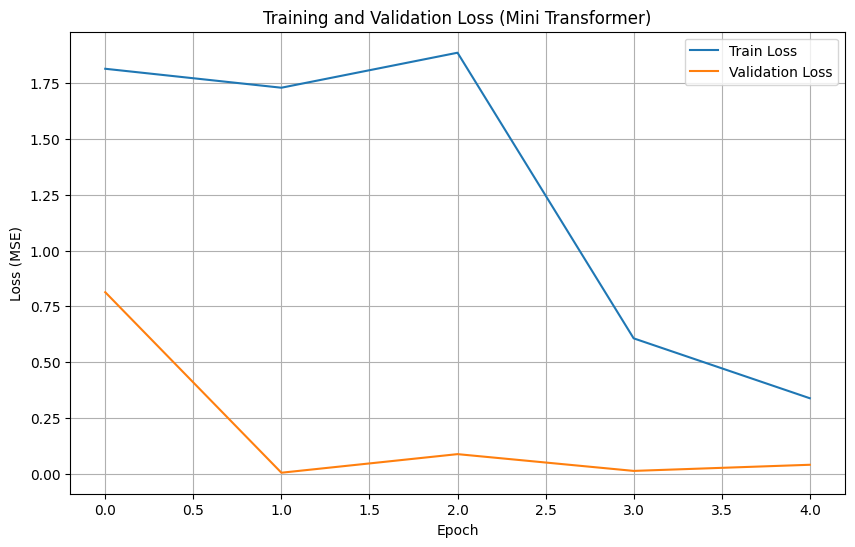

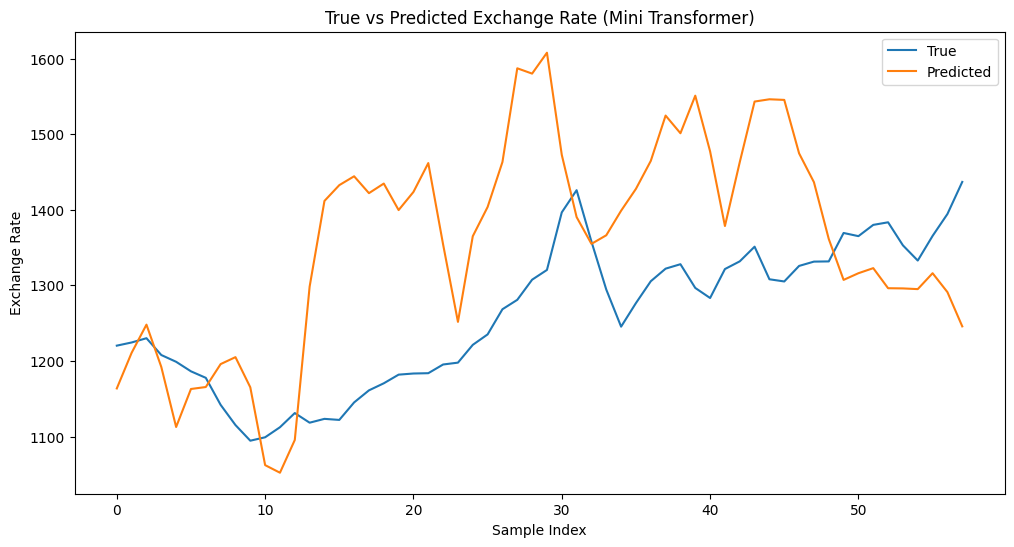

--------------------------------------------------


<Functional name=functional_347, built=True>

In [32]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# 3. Ï†ÑÏ≤¥ Î™®Îç∏ Íµ¨ÏÑ±
def build_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    # Transformer 2Ï∏µ
    x = transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=2, ff_dim=128, dropout=0.1)

    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# 4. ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Mini Transformer (ÏÉàÎ°úÏö¥ 18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë')

    model = build_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Mini Transformer + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # 5. loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (Mini Transformer)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 6. True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title('True vs Predicted Exchange Rate (Mini Transformer)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Í∑∏ÎåÄÎ°ú 18Í∞úÏùò ÌîºÏ≤òÎ•º ÏÇ¨Ïö©ÌïòÍ≥† mini Transfromer Î™®Îç∏ Î≥µÏû°ÎèÑ Í∞ïÌôî

ÏïûÏùÄ ÎÑàÎ¨¥ ÏñïÏïÑÏÑú Ïù¥ Î≥µÏû°Ìïú Íµ¨Ï°∞Î•º Î™ª Îî∞ÎùºÍ∞îÏùå (underfitting)

üöÄ Í∞ïÌôîÎêú Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Í∞ïÌôîÎêú Mini Transformer + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -1.6916
RMSE: 153.0880
MSE: 23435.9442
MAE: 125.6159


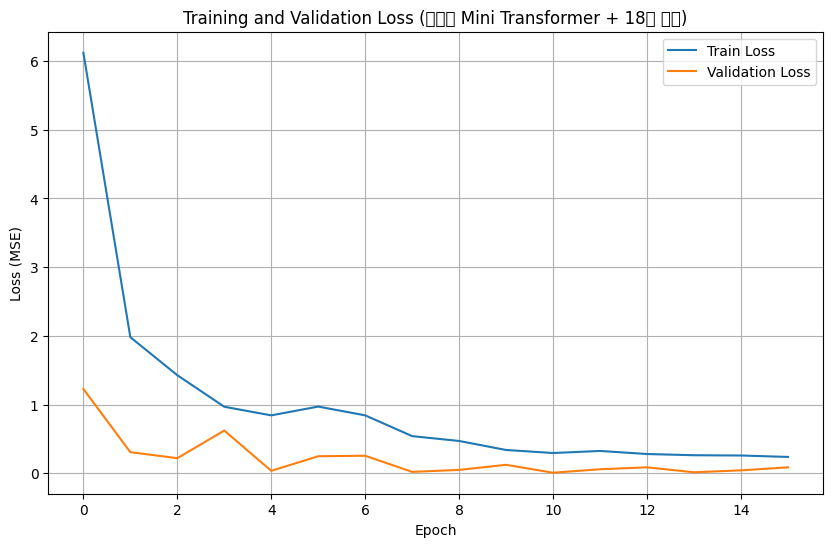

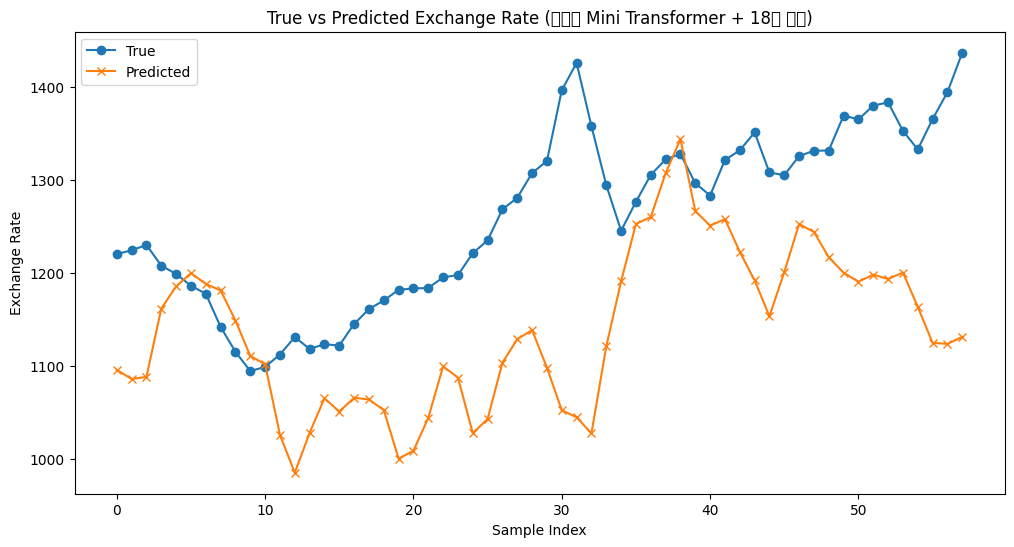

--------------------------------------------------


<Functional name=functional_348, built=True>

In [33]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Î™®Îç∏ Íµ¨ÏÑ±
def build_big_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.1)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_big_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ Í∞ïÌôîÎêú Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë')

    model = build_big_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (Í∞ïÌôîÎêú Mini Transformer + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (Í∞ïÌôîÎêú Mini Transformer + 18Í∞ú ÌîºÏ≤ò)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (Í∞ïÌôîÎêú Mini Transformer + 18Í∞ú ÌîºÏ≤ò)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_big_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### Î™®Îç∏ ÌäúÎãù

Dropout 0.15	: Ï†ÅÏ†àÌïú regularization Í∞ïÌôî (overfitting Î∞©ÏßÄ)

EarlyStopping patience=7	: Ï∂©Î∂ÑÌûà ÌïôÏäµ Í∏∞ÌöåÎ•º Ï§òÏÑú ÏÑ±Îä• Ìñ•ÏÉÅ Í∏∞Ìöå ÎäòÎ¶º



üöÄ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -1.3462
RMSE: 142.9287
MSE: 20428.6031
MAE: 117.9496


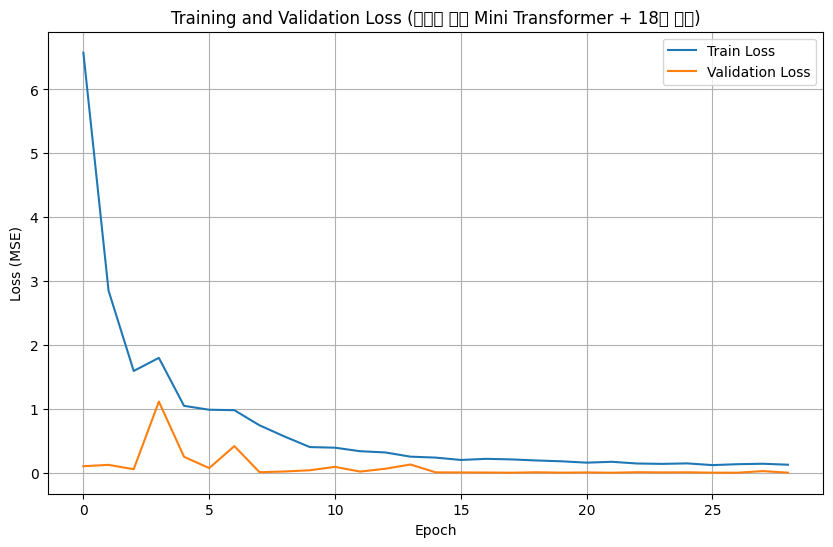

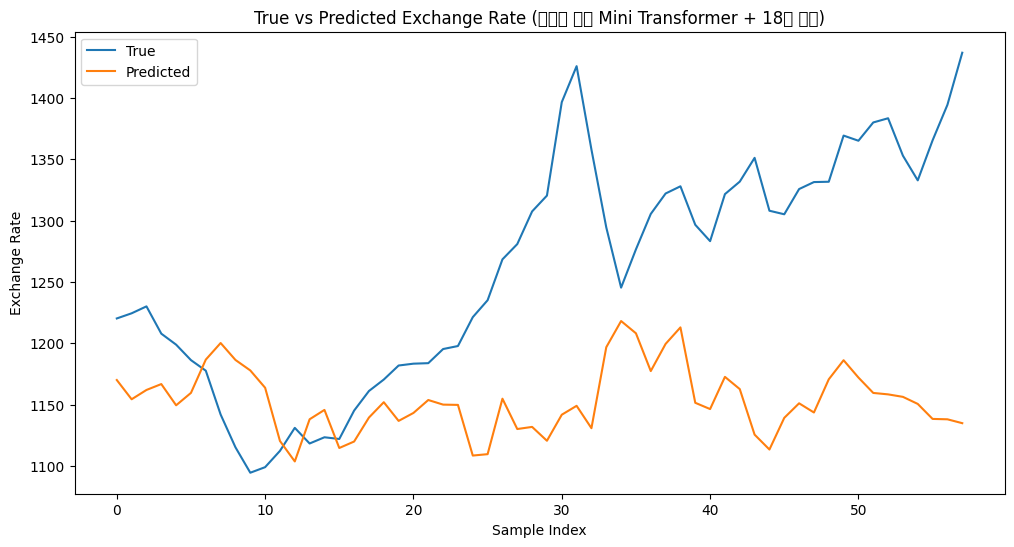

--------------------------------------------------


<Functional name=functional_352, built=True>

In [37]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Transformer Encoder Block (dropout 0.15Î°ú ÏàòÏ†ï)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.15):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Î™®Îç∏ Íµ¨ÏÑ±
def build_finetuned_big_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # learning rate 0.001 Ïú†ÏßÄ
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_finetuned_big_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë')

    model = build_finetuned_big_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # patience=7Î°ú ÏàòÏ†ï

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title('True vs Predicted Exchange Rate (ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_finetuned_big_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### (Ï†úÏùº Í¥úÏ∞ÆÏùå) ÎØ∏ÏÑ∏ ÌäúÎãù

Learning rate 0.0007 + Dense(128) + Batch Size 16 Ï°∞Ìï©ÏúºÎ°ú ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãù

Ìï≠Î™© | ÏàòÏ†ï
---|----
Dropout | 0.15 (Ïú†ÏßÄ)
Learning Rate | 0.0007 (ÎØ∏ÏÑ∏ Í∞êÏÜå)
Dense ÎÖ∏Îìú Ïàò | 128
Batch Size | 16
EarlyStopping patience | 7

üöÄ ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -0.2091
RMSE: 102.6051
MSE: 10527.8114
MAE: 83.4476


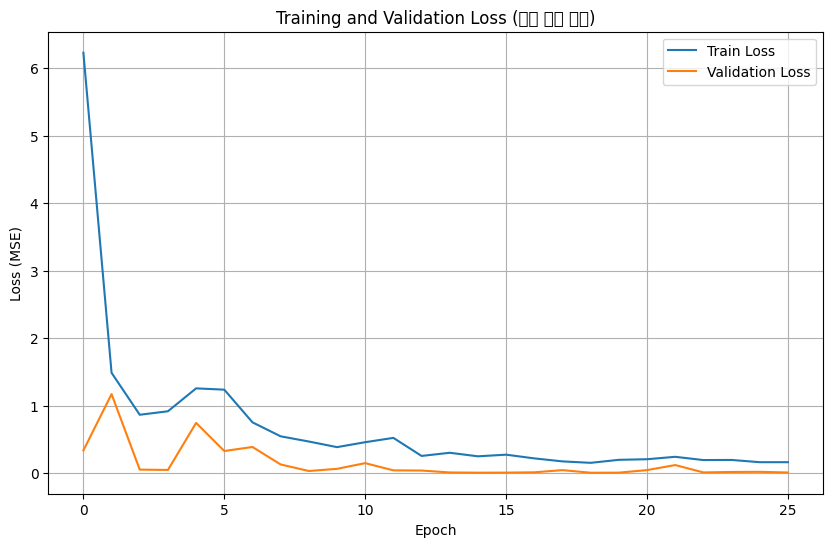

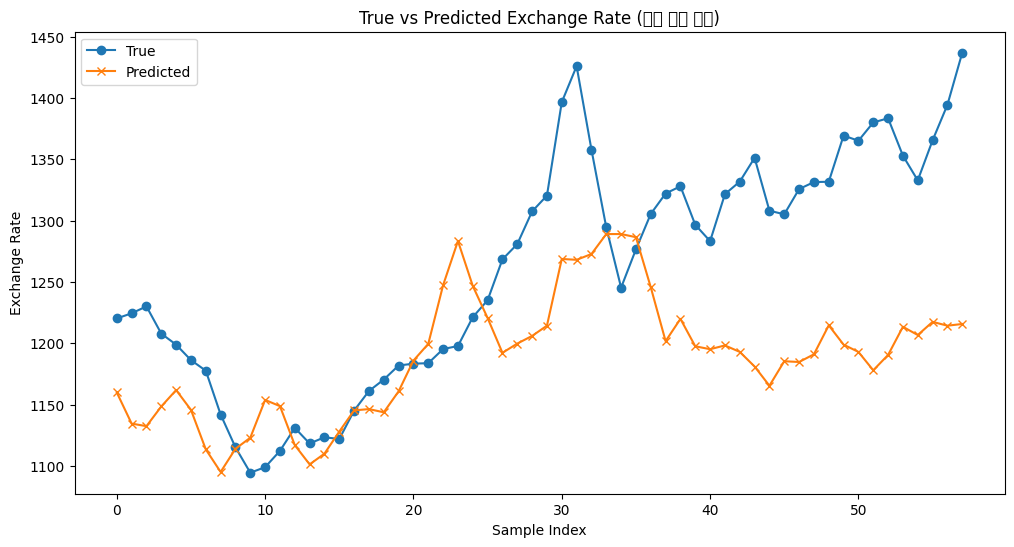

--------------------------------------------------


<Functional name=functional_355, built=True>

In [45]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ÏãúÎìú Í≥†Ï†ï
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Transformer Encoder Block (Dropout 0.15)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.15):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Î™®Îç∏ Íµ¨ÏÑ± (Dense(128)Î°ú Í∞ïÌôî)
def build_super_finetuned_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)  # ‚≠ê Dense 128Î°ú Ï¶ùÍ∞Ä
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007)  # ‚≠ê Learning rate 0.0007
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_super_finetuned_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer (18Í∞ú ÌîºÏ≤ò) ÌïôÏäµ ÏãúÏûë')

    model = build_super_finetuned_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,  # ‚≠ê Batch Size 16
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Í∞ïÌôî Mini Transformer + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãù)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãù)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_super_finetuned_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


### ÏãúÌÄÄÏä§ 6ÏúºÎ°ú Î≥ÄÍ≤Ω

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# (1) X, y Ï§ÄÎπÑ
X = df_fill[selected_backward]  # 18Í∞ú ÌîºÏ≤ò
y = df_fill['Ïõê/Îã¨Îü¨ÌôòÏú®_t+1']   # ÏòàÏ∏° ÌÉÄÍ≤ü

# (2) ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò (seq_length=6)
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# (3) ÏãúÌÄÄÏä§ ÏÉùÏÑ±
seq_length = 6
X_seq, y_seq = create_sequences(X.values, y.values, seq_length)

print(f"‚úÖ ÏãúÌÄÄÏä§ 6Í∞úÎ°ú ÏÉùÏÑ± ÏôÑÎ£å! X_seq shape: {X_seq.shape}, y_seq shape: {y_seq.shape}")

# (4) Train/Test Split
split = int(len(X_seq) * 0.8)
X_train_raw, X_test_raw = X_seq[:split], X_seq[split:]
y_train_raw, y_test_raw = y_seq[:split], y_seq[split:]

# (5) Ïä§ÏºÄÏùºÎßÅ
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# train
nsamples, timesteps, nfeatures = X_train_raw.shape
X_train_2d = X_train_raw.reshape((nsamples * timesteps, nfeatures))
X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape((nsamples, timesteps, nfeatures))
y_train_scaled = scaler_y.fit_transform(y_train_raw.reshape(-1, 1))

# test
nsamples_test, _, _ = X_test_raw.shape
X_test_2d = X_test_raw.reshape((nsamples_test * timesteps, nfeatures))
X_test_scaled = scaler_X.transform(X_test_2d).reshape((nsamples_test, timesteps, nfeatures))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

print(f"‚úÖ Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å! X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")

‚úÖ ÏãúÌÄÄÏä§ 6Í∞úÎ°ú ÏÉùÏÑ± ÏôÑÎ£å! X_seq shape: (293, 6, 18), y_seq shape: (293,)
‚úÖ Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å! X_train_scaled shape: (234, 6, 18), X_test_scaled shape: (59, 6, 18)


### ÏµúÏ¢Ö Í∞úÏÑ†Îêú Mini Transformer Î™®Îç∏

(Dropout 0.15, Dense(128), BatchSize 16, LearningRate 0.0007)

üöÄ ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãù + ÏãúÌÄÄÏä§ 6 Mini Transformer ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏãúÌÄÄÏä§ 6 Mini Transformer)
R¬≤: -4.1065
RMSE: 209.9162
MSE: 44064.8285
MAE: 173.4198


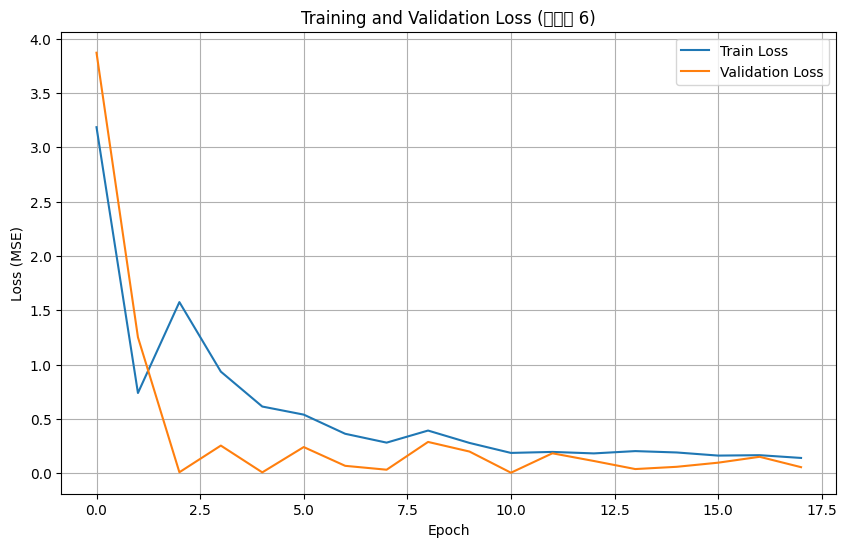

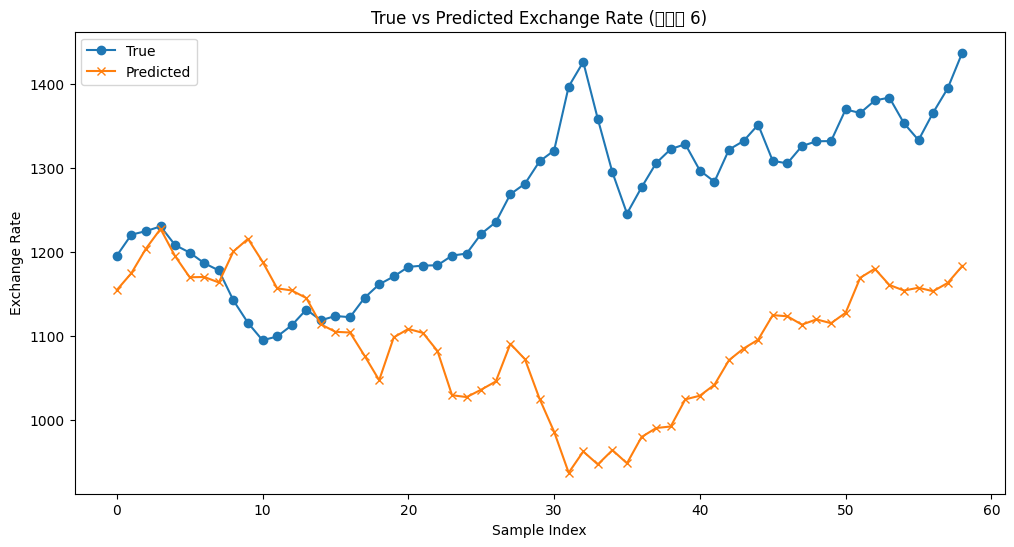

--------------------------------------------------


<Functional name=functional_354, built=True>

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.15):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dense(inputs.shape[-1])(x)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Î™®Îç∏ Íµ¨ÏÑ±
def build_seq6_transformer_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=256, dropout=0.15)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_seq6_transformer(X_train, y_train, X_test, y_test):
    print(f'üöÄ ÏµúÏ¢Ö ÎØ∏ÏÑ∏ ÌäúÎãù + ÏãúÌÄÄÏä§ 6 Mini Transformer ÌïôÏäµ ÏãúÏûë')

    model = build_seq6_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏãúÌÄÄÏä§ 6 Mini Transformer)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (ÏãúÌÄÄÏä§ 6)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (ÏãúÌÄÄÏä§ 6)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_seq6_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


-> ÏãúÌÄÄÏä§ 6Í≤∞Í≥º Ï¢ãÏßÄ ÏïäÏùå Îã§Ïãú ÏúÑÏùò ÏãúÌÄÄÏä§ 12 Ï†ÅÏö©

### LSTM

üöÄ LSTM Î™®Îç∏ (18Í∞ú ÌîºÏ≤ò, ÏãúÌÄÄÏä§ 12) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (LSTM + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -0.4531
RMSE: 112.4804
MSE: 12651.8427
MAE: 91.3964


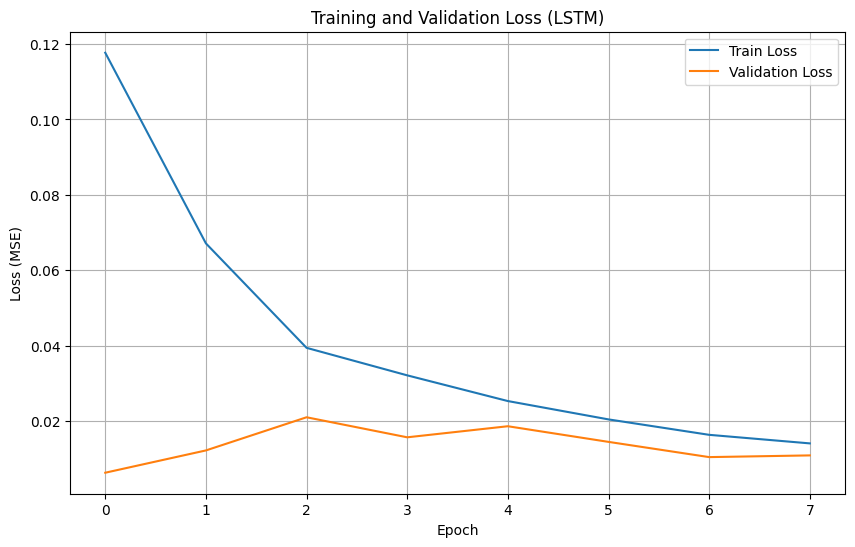

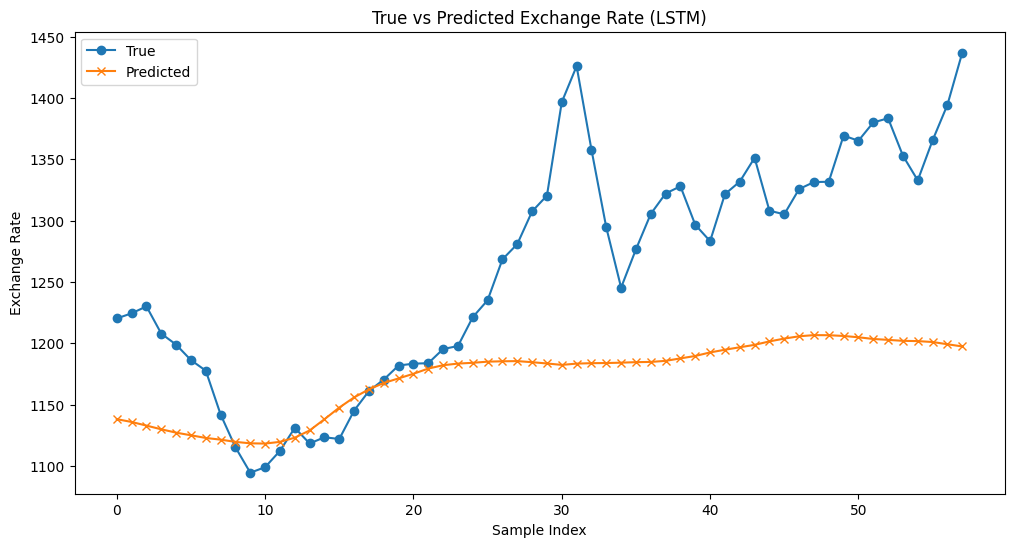

--------------------------------------------------


<Functional name=functional_356, built=True>

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Î™®Îç∏ Íµ¨ÏÑ±
def build_lstm_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = LSTM(64, return_sequences=True)(inputs)
    x = Dropout(0.2)(x)
    x = LSTM(32)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_lstm(X_train, y_train, X_test, y_test):
    print(f'üöÄ LSTM Î™®Îç∏ (18Í∞ú ÌîºÏ≤ò, ÏãúÌÄÄÏä§ 12) ÌïôÏäµ ÏãúÏûë')

    model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (LSTM + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (LSTM)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (LSTM)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_lstm(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


#### LSTM Í∞úÏÑ†

LSTMÏùÑ 3Ï∏µ (64 ‚Üí 32 ‚Üí 16)ÏúºÎ°ú ÍπäÍ≤å ÏåìÏïÑÏÑú

Dense(256) Î†àÏù¥Ïñ¥Î°ú Î≥µÏû°Ìïú ÌîºÏ≤ò Ï°∞Ìï©ÏùÑ ÌïôÏäµ

Dropout 0.1Î°ú regularizationÏùÄ Í∞ÄÎ≥çÍ≤å Ï†ÅÏö©

Adam(learning_rate=0.001)Î°ú Î∂ÄÎìúÎüΩÍ≥† Îπ†Î•∏ ÏµúÏ†ÅÌôî

üöÄ ÏµúÏ†ÅÌôîÎêú LSTM Î™®Îç∏ (18Í∞ú ÌîºÏ≤ò, ÏãúÌÄÄÏä§ 12) ÌïôÏäµ ÏãúÏûë
üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏµúÏ†ÅÌôîÎêú LSTM + 18Í∞ú ÌîºÏ≤ò)
R¬≤: -0.2456
RMSE: 104.1426
MSE: 10845.6809
MAE: 86.2073


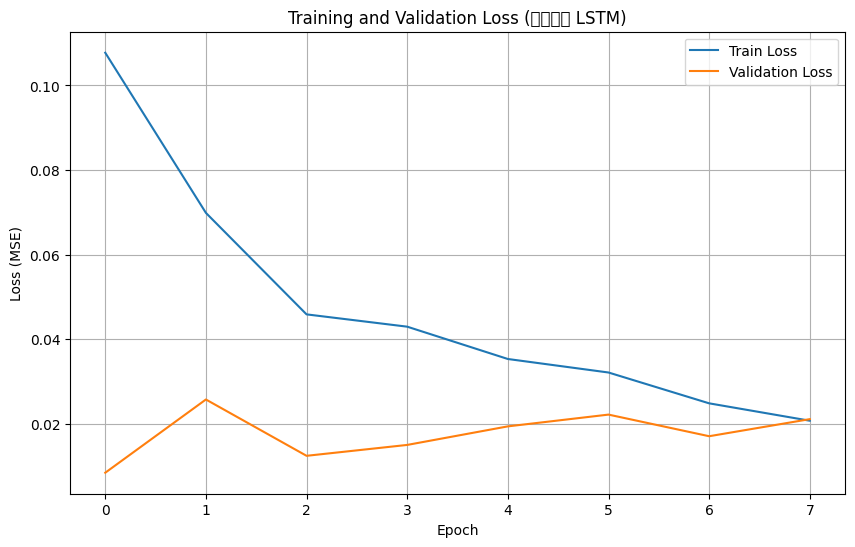

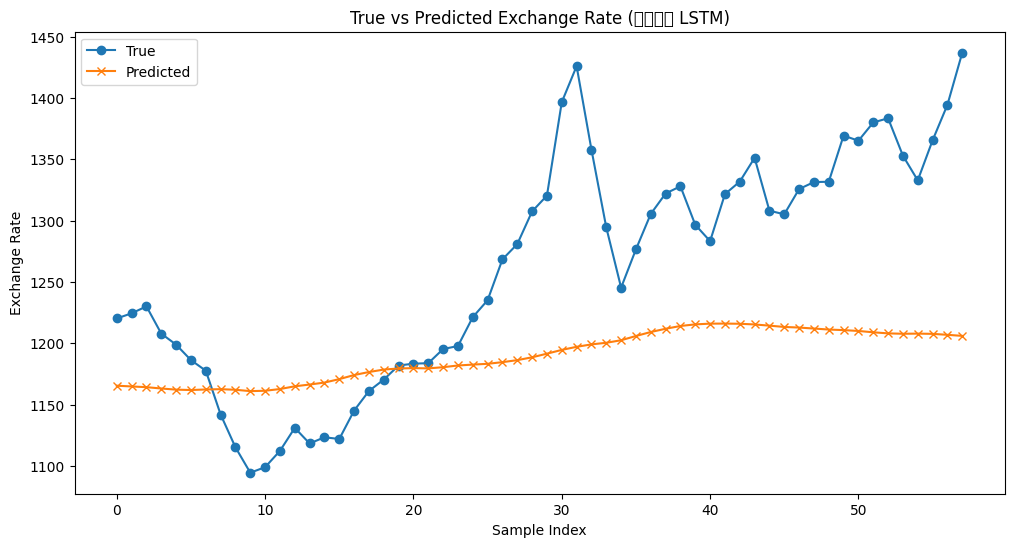

--------------------------------------------------


<Functional name=functional_359, built=True>

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Î™®Îç∏ Íµ¨ÏÑ±
def build_optimized_lstm_model(input_shape):
    tf.random.set_seed(42)

    inputs = Input(shape=input_shape)

    x = LSTM(64, return_sequences=True)(inputs)
    x = Dropout(0.1)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.1)(x)
    x = LSTM(16)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
def train_and_evaluate_optimized_lstm(X_train, y_train, X_test, y_test):
    print(f'üöÄ ÏµúÏ†ÅÌôîÎêú LSTM Î™®Îç∏ (18Í∞ú ÌîºÏ≤ò, ÏãúÌÄÄÏä§ 12) ÌïôÏäµ ÏãúÏûë')

    model = build_optimized_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0,
        shuffle=False
    )

    # ÏòàÏ∏°
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"üéØ ÏµúÏ¢Ö ÏÑ±Îä• (ÏµúÏ†ÅÌôîÎêú LSTM + 18Í∞ú ÌîºÏ≤ò)")
    print(f"R¬≤: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    # loss vs val_loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (ÏµúÏ†ÅÌôîÎêú LSTM)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # True vs Predicted Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12,6))
    plt.plot(y_true, label='True', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('True vs Predicted Exchange Rate (ÏµúÏ†ÅÌôîÎêú LSTM)')
    plt.xlabel('Sample Index')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

    print('-'*50)

    return model

# ========== Ïã§Ìñâ ==========

train_and_evaluate_optimized_lstm(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
